In [431]:
#Incluya las principales librerias a utilizar
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss

# Carga de Datos

##### Lee el archivo Excel

In [432]:
#data = pd.read_excel('Data/Centrifuge - 2025-05-03 - 2022-01-23.xlsx')

##### Guadar como csc

In [433]:
#excel_file.to_csv('Centrifuge.csv', index=False)

##### Leer el archivo en csv

In [434]:
data = pd.read_csv('Data/Centrifuge 2021-07-15T ---- 2025-06-24T.csv',sep=',')

# Analisis y exploracion de datos

| **Columna** | **Tipo de Dato** | **Descripción / Significado**                                                                                      |
| ----------- | ---------------- | ------------------------------------------------------------------------------------------------------------------ |
| `timeOpen`  | `object` (str)   | Fecha y hora en que se abrió el período de trading (por lo general, el inicio del día).                            |
| `timeClose` | `object` (str)   | Fecha y hora en que se cerró el período de trading (por lo general, el final del día).                             |
| `timeHigh`  | `object` (str)   | Momento exacto en que el precio alcanzó su punto más alto en ese día.                                              |
| `timeLow`   | `object` (str)   | Momento exacto en que el precio alcanzó su punto más bajo en ese día.                                              |
| `name`      | `int64`          | Parece ser un identificador del activo o criptomoneda (en este caso siempre es 2781, probablemente un ID interno). |
| `open`      | `float64`        | Precio al inicio del día (apertura).                                                                               |
| `high`      | `float64`        | Precio más alto alcanzado durante el día.                                                                          |
| `low`       | `float64`        | Precio más bajo alcanzado durante el día.                                                                          |
| `close`     | `float64`        | Precio al final del día (cierre).                                                                                  |
| `volume`    | `float64`        | Volumen total de operaciones (cantidad de CFG movidos) durante ese día.                                            |
| `marketCap` | `float64`        | Capitalización de mercado estimada para ese día (precio \* número de monedas en circulación).                      |
| `timestamp` | `object` (str)   | Marca de tiempo estándar que parece coincidir con `timeClose` (se puede usar para ordenar cronológicamente).       |


In [435]:
data.head(-1)

,timeOpen,timeClose,timeHigh,timeLow,name,open,high,low,close,volume,marketCap,timestamp
0,2025-06-24T00:00:00.000Z,2025-06-24T23:59:59.999Z,2025-06-24T21:00:00.000Z,2025-06-24T02:34:00.000Z,2781,0.159236,0.221995,0.157215,0.201760,13079214.49,1.129968e+08,2025-06-24T23:59:59.999Z
1,2025-06-23T00:00:00.000Z,2025-06-23T23:59:59.999Z,2025-06-23T23:52:00.000Z,2025-06-23T17:17:00.000Z,2781,0.146956,0.159485,0.145891,0.159236,1113185.80,8.917615e+07,2025-06-23T23:59:59.999Z
2,2025-06-22T00:00:00.000Z,2025-06-22T23:59:59.999Z,2025-06-22T00:58:00.000Z,2025-06-22T20:30:00.000Z,2781,0.157248,0.159123,0.139094,0.146956,597257.80,8.229018e+07,2025-06-22T23:59:59.999Z
3,2025-06-21T00:00:00.000Z,2025-06-21T23:59:59.999Z,2025-06-21T10:40:00.000Z,2025-06-21T23:38:00.000Z,2781,0.162862,0.165504,0.155131,0.157248,345399.71,8.804398e+07,2025-06-21T23:59:59.999Z
4,2025-06-20T00:00:00.000Z,2025-06-20T23:59:59.999Z,2025-06-20T08:45:00.000Z,2025-06-20T17:59:00.000Z,2781,0.167361,0.171724,0.161500,0.162862,392655.82,9.117987e+07,2025-06-20T23:59:59.999Z
...,...,...,...,...,...,...,...,...,...,...,...,...
1435,2021-07-20T00:00:00.000Z,2021-07-20T23:59:59.999Z,2021-07-20T00:05:07.000Z,2021-07-20T03:21:17.000Z,2781,0.743166,0.756749,0.680688,0.690165,1289307.13,0.000000e+00,2021-07-20T23:59:59.999Z
1436,2021-07-19T00:00:00.000Z,2021-07-19T23:59:59.999Z,2021-07-19T21:39:07.000Z,2021-07-19T14:35:10.000Z,2781,0.792462,0.800481,0.706497,0.739760,1392829.18,0.000000e+00,2021-07-19T23:59:59.999Z
1437,2021-07-18T00:00:00.000Z,2021-07-18T23:59:59.999Z,2021-07-18T00:01:07.000Z,2021-07-18T17:02:07.000Z,2781,0.846978,0.847008,0.748613,0.791248,1628929.86,0.000000e+00,2021-07-18T23:59:59.999Z
1438,2021-07-17T00:00:00.000Z,2021-07-17T23:59:59.999Z,2021-07-17T22:04:07.000Z,2021-07-17T00:47:07.000Z,2781,0.786101,0.899064,0.750816,0.846789,4481304.58,0.000000e+00,2021-07-17T23:59:59.999Z


In [436]:
data.shape

(1441, 12)

In [437]:
data.columns

Index(['timeOpen', 'timeClose', 'timeHigh', 'timeLow', 'name', 'open', 'high',
       'low', 'close', 'volume', 'marketCap', 'timestamp'],
      dtype='object')

In [438]:
data[data['name'] != 2781]

,timeOpen,timeClose,timeHigh,timeLow,name,open,high,low,close,volume,marketCap,timestamp


El name vendria a hacer una id, que todos tienen lo cual es inecesario, por lo cual procedere a eliminarla

In [439]:
data.drop(columns=['name'], inplace=True)

##### Procedere a ver la informacion que tengo

In [440]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1441 entries, 0 to 1440
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timeOpen   1441 non-null   object 
 1   timeClose  1441 non-null   object 
 2   timeHigh   1441 non-null   object 
 3   timeLow    1441 non-null   object 
 4   open       1441 non-null   float64
 5   high       1441 non-null   float64
 6   low        1441 non-null   float64
 7   close      1441 non-null   float64
 8   volume     1441 non-null   float64
 9   marketCap  1441 non-null   float64
 10  timestamp  1441 non-null   object 
dtypes: float64(6), object(5)
memory usage: 124.0+ KB


Convertir fechas de tipo object a datetime permite analizarlas correctamente, extraer componentes como día, mes o año, ordenar cronológicamente y generar variables útiles para modelos predictivos basados en el tiempo.

In [441]:
fechas = ['timeOpen', 'timeClose', 'timeHigh', 'timeLow', 'timestamp']

In [442]:
for col in fechas:
    data[col] = pd.to_datetime(data[col])

In [443]:
data.head(-1)

,timeOpen,timeClose,timeHigh,timeLow,open,high,low,close,volume,marketCap,timestamp
0,2025-06-24 00:00:00+00:00,2025-06-24 23:59:59.999000+00:00,2025-06-24 21:00:00+00:00,2025-06-24 02:34:00+00:00,0.159236,0.221995,0.157215,0.201760,13079214.49,1.129968e+08,2025-06-24 23:59:59.999000+00:00
1,2025-06-23 00:00:00+00:00,2025-06-23 23:59:59.999000+00:00,2025-06-23 23:52:00+00:00,2025-06-23 17:17:00+00:00,0.146956,0.159485,0.145891,0.159236,1113185.80,8.917615e+07,2025-06-23 23:59:59.999000+00:00
2,2025-06-22 00:00:00+00:00,2025-06-22 23:59:59.999000+00:00,2025-06-22 00:58:00+00:00,2025-06-22 20:30:00+00:00,0.157248,0.159123,0.139094,0.146956,597257.80,8.229018e+07,2025-06-22 23:59:59.999000+00:00
3,2025-06-21 00:00:00+00:00,2025-06-21 23:59:59.999000+00:00,2025-06-21 10:40:00+00:00,2025-06-21 23:38:00+00:00,0.162862,0.165504,0.155131,0.157248,345399.71,8.804398e+07,2025-06-21 23:59:59.999000+00:00
4,2025-06-20 00:00:00+00:00,2025-06-20 23:59:59.999000+00:00,2025-06-20 08:45:00+00:00,2025-06-20 17:59:00+00:00,0.167361,0.171724,0.161500,0.162862,392655.82,9.117987e+07,2025-06-20 23:59:59.999000+00:00
...,...,...,...,...,...,...,...,...,...,...,...
1435,2021-07-20 00:00:00+00:00,2021-07-20 23:59:59.999000+00:00,2021-07-20 00:05:07+00:00,2021-07-20 03:21:17+00:00,0.743166,0.756749,0.680688,0.690165,1289307.13,0.000000e+00,2021-07-20 23:59:59.999000+00:00
1436,2021-07-19 00:00:00+00:00,2021-07-19 23:59:59.999000+00:00,2021-07-19 21:39:07+00:00,2021-07-19 14:35:10+00:00,0.792462,0.800481,0.706497,0.739760,1392829.18,0.000000e+00,2021-07-19 23:59:59.999000+00:00
1437,2021-07-18 00:00:00+00:00,2021-07-18 23:59:59.999000+00:00,2021-07-18 00:01:07+00:00,2021-07-18 17:02:07+00:00,0.846978,0.847008,0.748613,0.791248,1628929.86,0.000000e+00,2021-07-18 23:59:59.999000+00:00
1438,2021-07-17 00:00:00+00:00,2021-07-17 23:59:59.999000+00:00,2021-07-17 22:04:07+00:00,2021-07-17 00:47:07+00:00,0.786101,0.899064,0.750816,0.846789,4481304.58,0.000000e+00,2021-07-17 23:59:59.999000+00:00


In [444]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1441 entries, 0 to 1440
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   timeOpen   1441 non-null   datetime64[ns, UTC]
 1   timeClose  1441 non-null   datetime64[ns, UTC]
 2   timeHigh   1441 non-null   datetime64[ns, UTC]
 3   timeLow    1441 non-null   datetime64[ns, UTC]
 4   open       1441 non-null   float64            
 5   high       1441 non-null   float64            
 6   low        1441 non-null   float64            
 7   close      1441 non-null   float64            
 8   volume     1441 non-null   float64            
 9   marketCap  1441 non-null   float64            
 10  timestamp  1441 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](5), float64(6)
memory usage: 124.0 KB


Las fechas en el dataset tienen el formato:

`YYYY-MM-DD HH:MM:SS.ssssss+00:00`

Este formato está representando varias cosas:

1. **Fecha y hora**: La primera parte (`YYYY-MM-DD HH:MM:SS.ssssss`) representa el año, mes, día, hora, minuto, segundo y fracción de segundo (milisegundos o microsegundos, dependiendo de la precisión). Por ejemplo, `2025-05-03 00:00:00` es el 3 de mayo de 2025 a medianoche.

2. **Zona horaria**: El `+00:00` al final indica que las fechas están en el horario UTC (Tiempo Universal Coordinado), que no tiene ningún desfase respecto a otras zonas horarias.



### **Mostrare los datos estadisticos descriptivos de las columnas númericas y de las columnas de tipo fecha.**

#### Tipo numericas

In [445]:
numericas = data.select_dtypes(include='float64')

In [446]:
numericas.describe()

,open,high,low,close,volume,marketCap
count,1441.000000,1441.000000,1441.000000,1441.000000,1.441000e+03,1.441000e+03
mean,0.489374,0.515874,0.469407,0.488722,1.334351e+06,1.464211e+08
std,0.379816,0.406390,0.359963,0.378941,5.936381e+06,8.927266e+07
min,0.107602,0.114406,0.100133,0.107602,8.480795e+04,0.000000e+00
25%,0.252216,0.264449,0.241570,0.251915,3.467365e+05,8.635861e+07
50%,0.334266,0.348767,0.323350,0.333948,7.296355e+05,1.092698e+08
75%,0.629336,0.657552,0.600946,0.628064,1.367562e+06,1.827412e+08
max,2.125339,2.582033,1.953302,2.124399,2.173517e+08,5.185458e+08


In [447]:
for col in numericas.columns:
    print(f"\nColumna: {col}")
    print(f"  Mediana: {numericas[col].median()}")
    print(f"  Moda:    {numericas[col].mode()[0]}")


Columna: open
  Mediana: 0.334266087
  Moda:    0.10760223

Columna: high
  Mediana: 0.348767044
  Moda:    0.114406451

Columna: low
  Mediana: 0.323350376
  Moda:    0.100132557

Columna: close
  Mediana: 0.33394826
  Moda:    0.10760223

Columna: volume
  Mediana: 729635.52
  Moda:    84807.95

Columna: marketCap
  Mediana: 109269752.3
  Moda:    0.0


#### Tipo Fecha

In [448]:
Fecha = data.select_dtypes(include='datetime64[ns, UTC]')

In [449]:
Fecha.describe()

,timeOpen,timeClose,timeHigh,timeLow,timestamp
count,1441,1441,1441,1441,1441
mean,2023-07-05 00:00:00+00:00,2023-07-05 23:59:59.999000064+00:00,2023-07-05 10:49:40.972935680+00:00,2023-07-05 12:39:46.481609728+00:00,2023-07-05 23:59:59.999000064+00:00
min,2021-07-15 00:00:00+00:00,2021-07-15 23:59:59.999000+00:00,2021-07-15 04:00:40+00:00,2021-07-15 18:18:09+00:00,2021-07-15 23:59:59.999000+00:00
25%,2022-07-10 00:00:00+00:00,2022-07-10 23:59:59.999000064+00:00,2022-07-10 07:34:00+00:00,2022-07-10 23:51:00+00:00,2022-07-10 23:59:59.999000064+00:00
50%,2023-07-05 00:00:00+00:00,2023-07-05 23:59:59.999000064+00:00,2023-07-05 00:17:00+00:00,2023-07-05 14:40:00+00:00,2023-07-05 23:59:59.999000064+00:00
75%,2024-06-29 00:00:00+00:00,2024-06-29 23:59:59.999000064+00:00,2024-06-29 01:56:00+00:00,2024-06-29 23:41:00+00:00,2024-06-29 23:59:59.999000064+00:00
max,2025-06-24 00:00:00+00:00,2025-06-24 23:59:59.999000+00:00,2025-06-24 21:00:00+00:00,2025-06-24 02:34:00+00:00,2025-06-24 23:59:59.999000+00:00


### Analisis descriptivo

| **Categoría**     | **Columna**                    | **Análisis / Observación**                                                                                   |
| ----------------- | ------------------------------ | ------------------------------------------------------------------------------------------------------------ |
| 📈 Precios        | `open`, `high`, `low`, `close` | Valores medios entre 0.3–0.4; moda cercana al mínimo → pasó mucho tiempo en precios bajos. Alta volatilidad. |
| 📊 Volumen        | `volume`                       | Muy variable: de 84K a 217M. Moda baja → usualmente poco volumen, con picos fuertes.                         |
| 💰 Capitalización | `marketCap`                    | Rango entre 47M y 518M. Refleja un activo pequeño o mediano, no un top-tier.                                 |
| 📆 Fechas         | `timeOpen`, `timeClose`, etc.  | De 2022 a 2025. Bien distribuido. Formato UTC ideal para modelos de series temporales.                       |


### Analisis de outliers

| **Columna**                    | **Motivo de posible outlier**                                                                                                                                                           |
| ------------------------------ | --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| `volume`                       | La media (\~1.2M) es mucho mayor que la mediana (\~638K), y el máximo (217M) es **más de 300 veces mayor** que el mínimo. Esto sugiere que hay días con volúmenes extremadamente altos. |
| `marketCap`                    | La media y mediana están bastante separadas, y el máximo (518M) también es muy superior al mínimo (47M), aunque menos extremo que en `volume`.                                          |
| `high`, `low`, `open`, `close` | No hay signos tan fuertes de outliers, pero puedes verificar con un boxplot para ver si hay días con precios fuera de rango habitual.                                                   |


#  Razones para eliminar las columnas de fecha en modelos no basados en series temporales

| **Columna** | **Motivo de Eliminación**                                                                                        | **Columna Usada** | **Motivo de Uso**                                                                                                             |
| ----------- | ---------------------------------------------------------------------------------------------------------------- | ----------------- | ----------------------------------------------------------------------------------------------------------------------------- |
| `timeHigh`  | No es relevante para la predicción del valor, solo indica el momento exacto de los picos de precios.             | `timestamp`       | Representa el tiempo de forma continua, útil para modelos de series temporales y predicciones a largo plazo.                  |
| `timeLow`   | Similar a `timeHigh`, no aporta información adicional útil para el modelo predictivo.                            | `timestamp`       | Ya incluye toda la información temporal relevante y es un formato continuo que permite representar las relaciones temporales. |
| `timeOpen`  | Es redundante si se usa `timestamp`, ya que `timestamp` tiene la fecha y hora exactas de apertura de cada valor. | `timestamp`       | Se utiliza para representar todas las fechas de la serie temporal en un formato único y continuo.                             |
| `timeClose` | Igual que `timeOpen`, es redundante si se usa `timestamp`, ya que no se necesita la hora exacta de cierre.       | `timestamp`       | Como `timestamp`, proporciona la fecha y hora, ideal para modelos de series temporales.                                       |


In [450]:
data = data.drop(columns=['timeHigh', 'timeLow', 'timeOpen', 'timeClose'])

### Beneficios Timestamp

| **Columna**   | **Razón para quedarme con ella**                                                                                                                                                                     | **Beneficios a Futuro**                                                                                                                                                                            |
| ------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **timestamp** | 1. **Referencia única y completa del tiempo**: Contiene fecha y hora exacta del registro, proporcionando una marca temporal precisa y consistente.                                                   | 1. **Análisis temporal robusto**: Permite el análisis detallado de los cambios a lo largo del tiempo, lo cual es crucial en modelos predictivos y series temporales.                               |
|               | 2. **Formato unificado**: Proporciona una columna con formato `datetime`, lo que facilita el procesamiento en los modelos sin tener que combinar otras columnas de tiempo.                           | 2. **Flexibilidad en la extracción de características**: Puedes extraer fácilmente atributos como día de la semana, mes, hora, o incluso hacer ajustes como diferencias de tiempo entre registros. |
|               | 3. **Adecuada para series temporales**: La estructura de la columna `timestamp` es ideal para alimentar modelos de Machine Learning que trabajan con datos temporales.                               | 3. **Escalabilidad**: Los modelos de Machine Learning podrán generalizar patrones temporales a largo plazo, mejorando el rendimiento a medida que se añaden más datos en el futuro.                |
|               | 4. **Reducción de redundancia**: Al eliminar las columnas `timeOpen`, `timeClose`, `timeHigh`, `timeLow`, evitas duplicar información temporal.                                                      | 4. **Facilita el análisis de tendencias**: La columna `timestamp` ayudará a identificar ciclos, patrones o anomalías basadas en las fechas, lo que es clave para la predicción de precios.         |
|               | 5. **Compatibilidad con bibliotecas y algoritmos**: La mayoría de las bibliotecas de Machine Learning (como `scikit-learn`, `XGBoost`, `LSTM`, etc.) están optimizadas para trabajar con `datetime`. | 5. **Integración con otras fuentes de datos**: La columna `timestamp` te permitirá combinar este conjunto con otros datos temporales provenientes de diversas fuentes sin perder precisión.        |


**Conclusion:**

1.  El uso de la columna **timestamp** es beneficioso porque proporciona una base sólida para análisis temporales y predicciones a futuro. Te permite trabajar con un formato unificado y preciso de fechas y horas, lo que facilitará el análisis de tendencias y patrones a lo largo del tiempo, algo esencial para la predicción de valores futuros de criptomonedas como Centrifuge (CFG). Además, te da flexibilidad para extraer características adicionales según lo necesites y optimiza la compatibilidad con técnicas de Machine Learning.
2. **timestamp** es más conveniente para análisis de series temporales y proporciona una referencia temporal más precisa, ya que marca el final de cada jornada. Usar timeOpen podría ser útil si realmente estás interesado solo en el inicio de cada jornada, pero para un modelo predictivo, especialmente en el análisis de criptomonedas, el **timestamp** es la mejor opción.



In [451]:
data.head(-1)

,open,high,low,close,volume,marketCap,timestamp
0,0.159236,0.221995,0.157215,0.201760,13079214.49,1.129968e+08,2025-06-24 23:59:59.999000+00:00
1,0.146956,0.159485,0.145891,0.159236,1113185.80,8.917615e+07,2025-06-23 23:59:59.999000+00:00
2,0.157248,0.159123,0.139094,0.146956,597257.80,8.229018e+07,2025-06-22 23:59:59.999000+00:00
3,0.162862,0.165504,0.155131,0.157248,345399.71,8.804398e+07,2025-06-21 23:59:59.999000+00:00
4,0.167361,0.171724,0.161500,0.162862,392655.82,9.117987e+07,2025-06-20 23:59:59.999000+00:00
...,...,...,...,...,...,...,...
1435,0.743166,0.756749,0.680688,0.690165,1289307.13,0.000000e+00,2021-07-20 23:59:59.999000+00:00
1436,0.792462,0.800481,0.706497,0.739760,1392829.18,0.000000e+00,2021-07-19 23:59:59.999000+00:00
1437,0.846978,0.847008,0.748613,0.791248,1628929.86,0.000000e+00,2021-07-18 23:59:59.999000+00:00
1438,0.786101,0.899064,0.750816,0.846789,4481304.58,0.000000e+00,2021-07-17 23:59:59.999000+00:00


#  Data faltante en cada columna y duplicados en las filas

### Data faltante

In [452]:
data.isnull().sum()

open         0
high         0
low          0
close        0
volume       0
marketCap    0
timestamp    0
dtype: int64

#### Verificar proporciones de valores nulos

In [453]:
print("Proporciones de valores nulos por columna:")
print(((data.isnull().sum() / len(data)) * 100).round(2))

Proporciones de valores nulos por columna:
open         0.0
high         0.0
low          0.0
close        0.0
volume       0.0
marketCap    0.0
timestamp    0.0
dtype: float64


### Data duplicada

In [454]:
duplicados = data.duplicated().sum()
print(f"Número de filas duplicadas: {duplicados}")

Número de filas duplicadas: 0


#### Observacion de filas duplicadas

In [455]:
print("Filas duplicadas:")
print(data[data.duplicated()])

Filas duplicadas:
Empty DataFrame
Columns: [open, high, low, close, volume, marketCap, timestamp]
Index: []


##### Muestra las filas duplicadas

In [456]:
print("Filas duplicadas:")
print(data[data.duplicated(keep=False)])

Filas duplicadas:
Empty DataFrame
Columns: [open, high, low, close, volume, marketCap, timestamp]
Index: []


# Identificar variables con valores atipicos

#### Revisando la cantidad de outliers y su porcentaje, en variables numericas

In [457]:
numericas = data.select_dtypes(include='number')

outliers_info = {}

for col in numericas.columns:
    Q1 = numericas[col].quantile(0.25)
    Q3 = numericas[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = numericas[(numericas[col] < lower_bound) | (numericas[col] > upper_bound)]
    cantidad = outliers.shape[0]
    porcentaje = (cantidad / len(numericas)) * 100

    outliers_info[col] = {
        'Cantidad Outliers': cantidad,
        'Porcentaje Outliers (%)': round(porcentaje, 2)
    }

outliers_df = pd.DataFrame(outliers_info).T
print(outliers_df)

           Cantidad Outliers  Porcentaje Outliers (%)
open                    91.0                     6.32
high                    97.0                     6.73
low                     91.0                     6.32
close                   91.0                     6.32
volume                  99.0                     6.87
marketCap              100.0                     6.94


**Conclusion:**

El análisis revela que las columnas de precios (`open`, `high`, `low`, `close`) presentan un bajo porcentaje de datos atípicos, todos entre 6% y 7%. Esto indica que los precios de la criptomoneda **Centrifuge (CFG)** han sido relativamente consistentes, pero con algunas variaciones extremas (Picos altas o bajos) en el tiempo.

Por otro lado, las variables `volume` (6.65%) y `marketCap` (5.94%) muestran un porcentaje similar en presencia de outliers. Esto sugiere que ha habido días con volúmenes de transacción y niveles de capitalización significativamente inusuales, posiblemente relacionados con eventos específicos del mercado o alta especulación. 

Estos outliers deben ser tratados con precaución: puedes optar por transformarlos (por ejemplo, usando logaritmos), imputarlos, o eliminarlos según el enfoque del modelo.




#### Revisando  outliers temporales (como días faltantes o saltos)

##### Ordenando por fecha primero

In [458]:
data = data.sort_values('timestamp')

##### Calculando diferencias entre fechas consecutivas

In [459]:
data['gap_days'] = data['timestamp'].diff().dt.days

##### Revisando si hay gaps grandes

In [460]:
print(data['gap_days'].describe())

count    1440.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: gap_days, dtype: float64


In [461]:
data.head(-1)

,open,high,low,close,volume,marketCap,timestamp,gap_days
1440,0.715827,0.801705,0.649642,0.672077,3421312.81,0.00,2021-07-15 23:59:59.999000+00:00,NaN
1439,0.672415,0.917558,0.600946,0.789246,3268867.42,0.00,2021-07-16 23:59:59.999000+00:00,1.0
1438,0.786101,0.899064,0.750816,0.846789,4481304.58,0.00,2021-07-17 23:59:59.999000+00:00,1.0
1437,0.846978,0.847008,0.748613,0.791248,1628929.86,0.00,2021-07-18 23:59:59.999000+00:00,1.0
1436,0.792462,0.800481,0.706497,0.739760,1392829.18,0.00,2021-07-19 23:59:59.999000+00:00,1.0
...,...,...,...,...,...,...,...,...
5,0.171802,0.183608,0.167320,0.167362,763192.76,93691874.89,2025-06-19 23:59:59.999000+00:00,1.0
4,0.167361,0.171724,0.161500,0.162862,392655.82,91179872.23,2025-06-20 23:59:59.999000+00:00,1.0
3,0.162862,0.165504,0.155131,0.157248,345399.71,88043975.23,2025-06-21 23:59:59.999000+00:00,1.0
2,0.157248,0.159123,0.139094,0.146956,597257.80,82290179.64,2025-06-22 23:59:59.999000+00:00,1.0


**Conclusión:**
- No hay gaps atípicos en los datos. Todos los registros están separados por un día exacto.

- Esto sugiere que los datos están bien distribuidos de manera diaria, sin interrupciones ni saltos de días.

##### Eliminando gap_days no aporta nada para el modelo, solo era para saber si tenia outliers

In [462]:
data.drop(columns=['gap_days'], inplace=True)

In [463]:
data.head()

,open,high,low,close,volume,marketCap,timestamp
1440,0.715827,0.801705,0.649642,0.672077,3421312.81,0.0,2021-07-15 23:59:59.999000+00:00
1439,0.672415,0.917558,0.600946,0.789246,3268867.42,0.0,2021-07-16 23:59:59.999000+00:00
1438,0.786101,0.899064,0.750816,0.846789,4481304.58,0.0,2021-07-17 23:59:59.999000+00:00
1437,0.846978,0.847008,0.748613,0.791248,1628929.86,0.0,2021-07-18 23:59:59.999000+00:00
1436,0.792462,0.800481,0.706497,0.739760,1392829.18,0.0,2021-07-19 23:59:59.999000+00:00


In [464]:
data[data["marketCap"]== 0]

,open,high,low,close,volume,marketCap,timestamp
1440,0.715827,0.801705,0.649642,0.672077,3421312.81,0.0,2021-07-15 23:59:59.999000+00:00
1439,0.672415,0.917558,0.600946,0.789246,3268867.42,0.0,2021-07-16 23:59:59.999000+00:00
1438,0.786101,0.899064,0.750816,0.846789,4481304.58,0.0,2021-07-17 23:59:59.999000+00:00
1437,0.846978,0.847008,0.748613,0.791248,1628929.86,0.0,2021-07-18 23:59:59.999000+00:00
1436,0.792462,0.800481,0.706497,0.739760,1392829.18,0.0,2021-07-19 23:59:59.999000+00:00
1435,0.743166,0.756749,0.680688,0.690165,1289307.13,0.0,2021-07-20 23:59:59.999000+00:00
1434,0.689935,0.745166,0.680984,0.696280,1387301.82,0.0,2021-07-21 23:59:59.999000+00:00
1433,0.697034,0.742178,0.685778,0.693646,1301633.49,0.0,2021-07-22 23:59:59.999000+00:00
1432,0.693790,0.744829,0.690016,0.715125,671421.99,0.0,2021-07-23 23:59:59.999000+00:00
1431,0.713651,0.728012,0.684756,0.692490,885540.98,0.0,2021-07-24 23:59:59.999000+00:00


Se observaron que hay filas que contienen 0s en la columna de marketcap. También se observa que esto ocurre un dias tras otro desde el primer dato histórico del criptoactivo. En estos casos, se optará por borrar las filas con marketcap 0. Esto no tendrá un impacto en nuestro análisis ni modelo debido a que solo representa el 1.4% de la data y ocurre en los primeros 20 días del criptoactivo 

# Evaluacion EDA

## Análisis Visual de Outliers y Distribución de Variables Financieras

#### Seleccionando solo las columnas numéricas relevantes

In [465]:
numeric_cols = ['open', 'high', 'low', 'close', 'volume', 'marketCap']


##### Graficando boxplots para cada columna

| Ventaja                         | Explicación                                                                                                 |
| ------------------------------- | ----------------------------------------------------------------------------------------------------------- |
| 📦 Detecta outliers visualmente | Muestra claramente qué valores están fuera del rango esperado (valores extremos por encima de los bigotes). |
| ⚡ Rápido y fácil de interpretar | No necesitas cálculos complicados para entender qué está pasando.                                           |
| 🔁 Útil para muchas columnas    | Puedes aplicarlo a todas las variables numéricas rápidamente.                                               |
| 📊 Resume distribución          | También te da la mediana, cuartiles y dispersión de los datos.                                              |


###### Boxplots

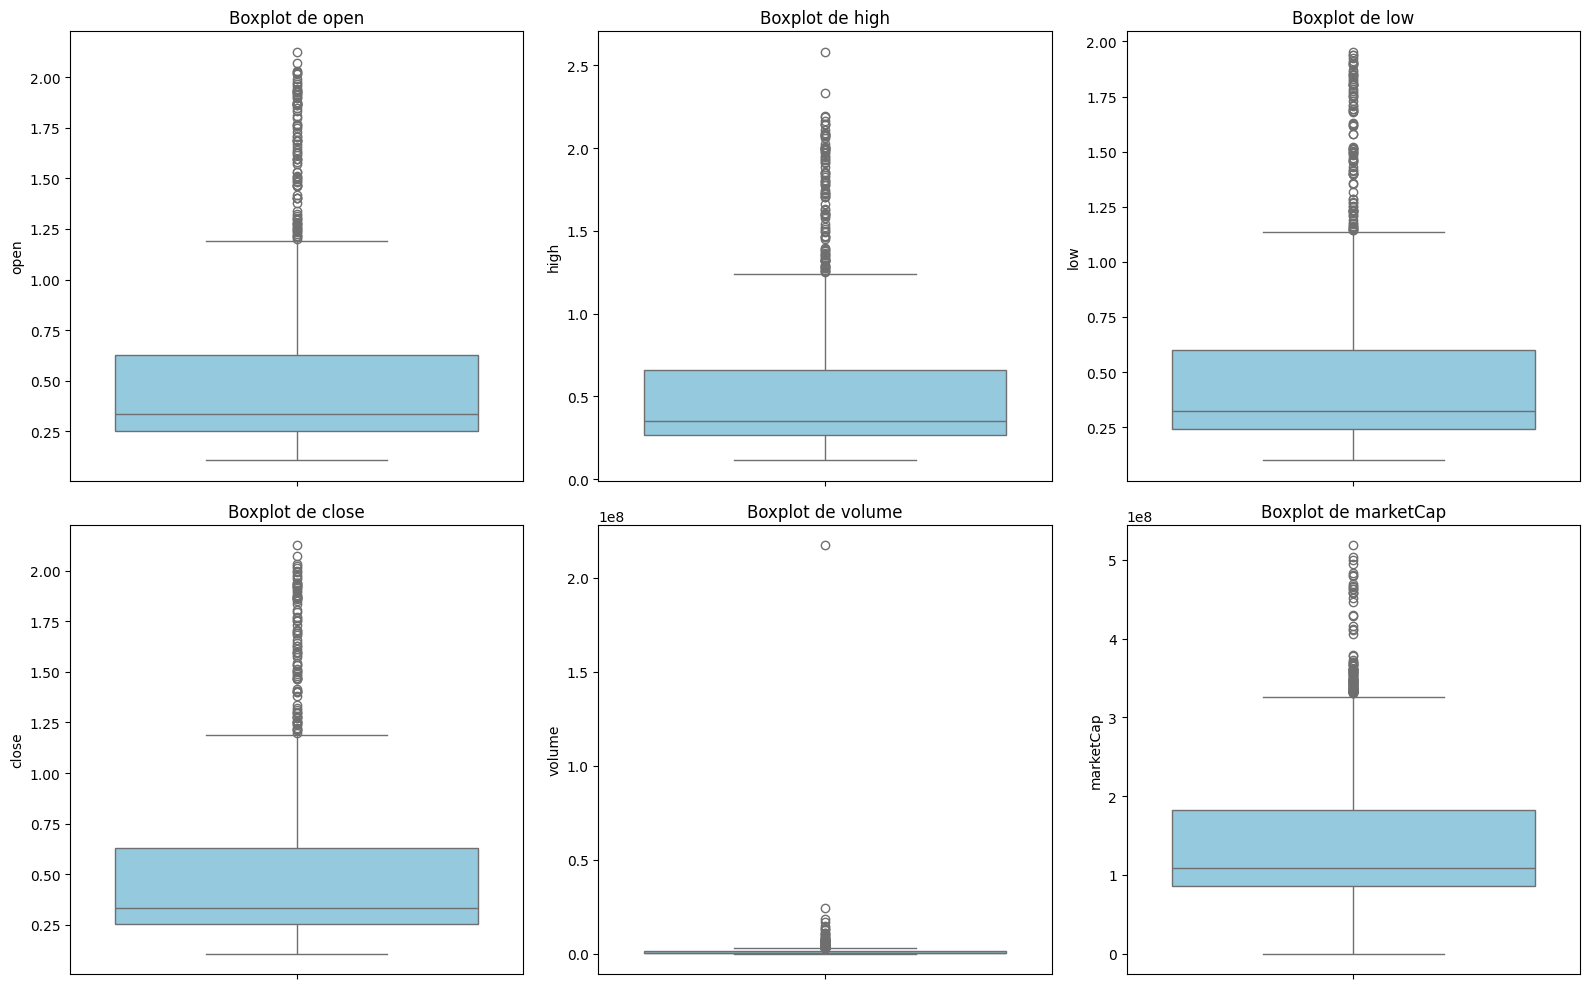

In [466]:
plt.figure(figsize=(16, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=data[col], color='skyblue')
    plt.title(f'Boxplot de {col}')
    plt.tight_layout()
plt.show()

###### Boxplots Escala logaritmica

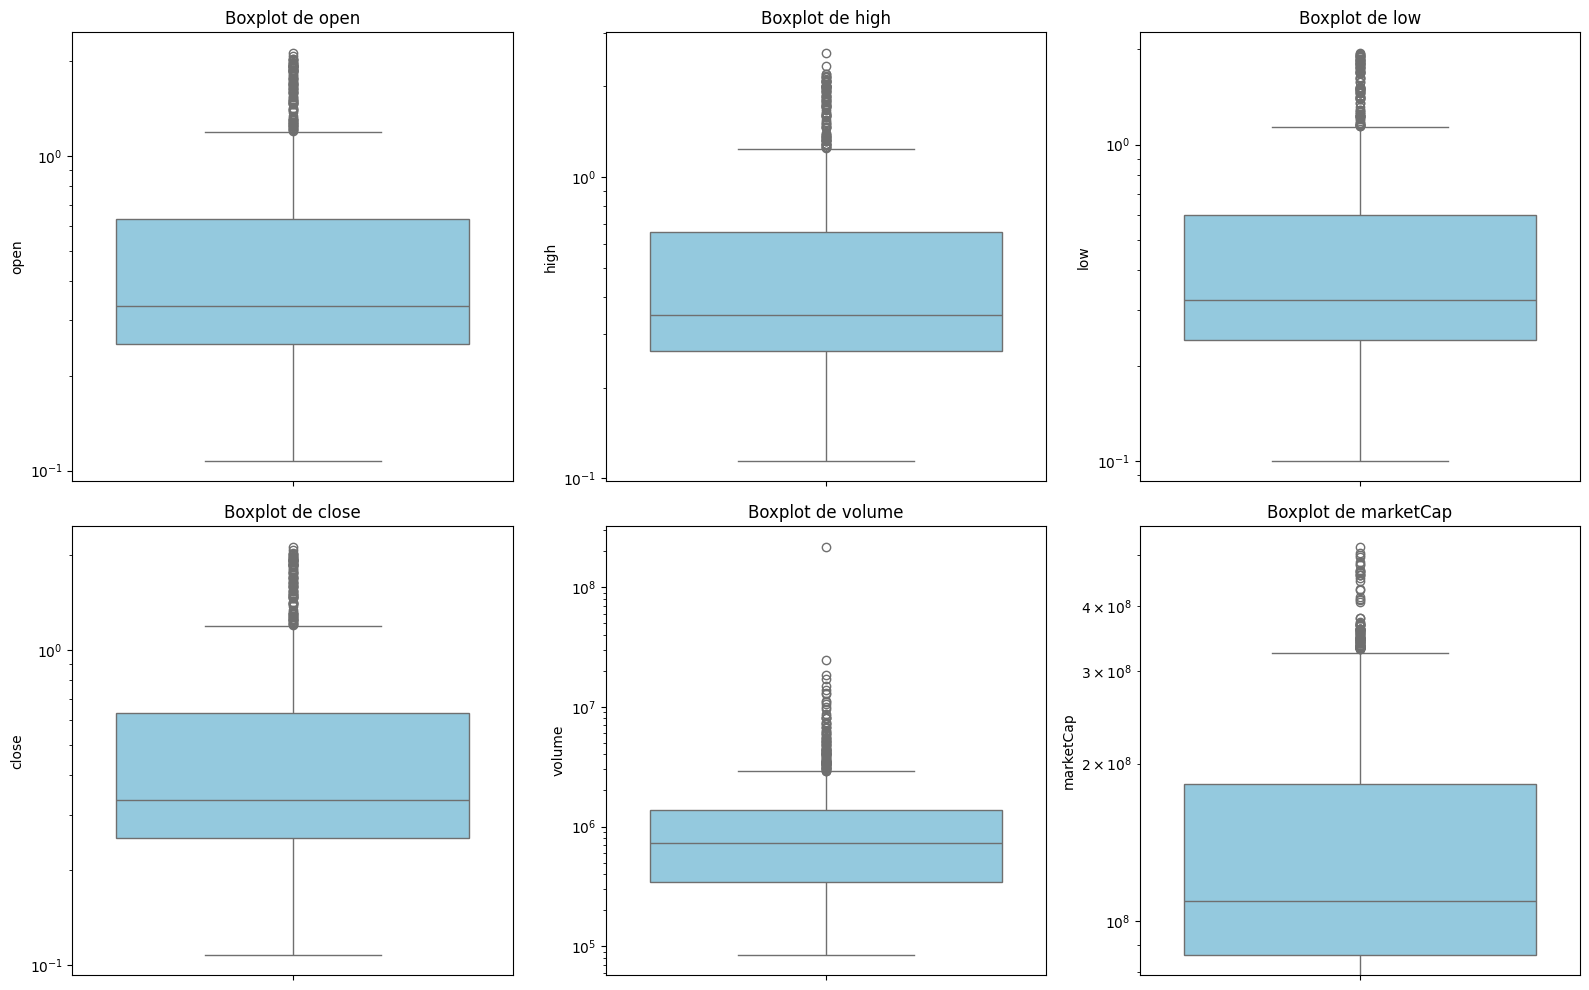

In [467]:
plt.figure(figsize=(16, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=data[col], color='skyblue')
    plt.yscale('log')
    plt.title(f'Boxplot de {col}')
    plt.tight_layout()
plt.show()

| **Columna** | % Outliers | Recomendación                | Justificación breve                                                                 |
| ----------- | ---------- | ---------------------------- | ----------------------------------------------------------------------------------- |
| `open`      | 6.44%      | ✅ **IQR Capping**            | Los valores extremos son pocos; puedes limitar sin afectar la distribución general. |
| `high`      | 6.87%      | ✅ **IQR Capping**            | Valores máximos diarios pueden ser normales pero extremos; mejor acotarlos.         |
| `low`       | 6.22%      | ✅ **IQR Capping**            | Similar a `high`, algunos mínimos pueden ser ruido o volatilidad puntual.           |
| `close`     | 6.44%      | ✅ **IQR Capping**            | Cierre tiende a seguir a apertura; ideal suavizar extremos sin eliminar datos.      |
| `volume`    | 6.65%      | 🔁 **Log1p + IQR Capping**   | Volumen suele ser muy sesgado; combina log para escala y capping para extremos.     |
| `marketCap` | 5.94%      | 🔁 **Log1p + Winsorización** | Muy sesgado, sensible a cambios extremos; usar log para escala y limitar extremos.  |




 🧠 Explicación adicional:

* **IQR Capping** = limita los valores a Q1 - 1.5×IQR y Q3 + 1.5×IQR.
* **Log1p** = transformación `log(1 + x)` que reduce sesgo positivo.
* **Winsorización** = similar a capping pero más suave, reemplaza por percentiles (P5, P95).



📌 Conclusión boxplots:

* Para columnas de **precios** (`open`, `high`, `low`, `close`): usa **IQR Capping** para mantener la estructura natural.
* Para columnas con **valores muy sesgados** (`volume`, `marketCap`): combina **logaritmo + winsorización** o **IQR capping** para obtener estabilidad y normalización sin perder datos.

##### Graficando la curva de densidad (KDE)

| **Ventaja**                               | **Explicación**                                                                     |
| ----------------------------------------- | ----------------------------------------------------------------------------------- |
| 🔄 **Distribución continua y suave**      | Muestra la forma general de los datos sin depender de cortes (bins) arbitrarios.    |
| 📊 **Detecta múltiples modas fácilmente** | Permite identificar si la distribución tiene más de un pico (bimodal o multimodal). |
| 📈 **Comparación entre variables**        | Útil para superponer varias curvas y comparar distribuciones sin confusión visual.  |
| 🔎 **Ideal para ver sesgo y simetría**    | Muestra si los datos están sesgados a la izquierda o derecha, o si son simétricos.  |



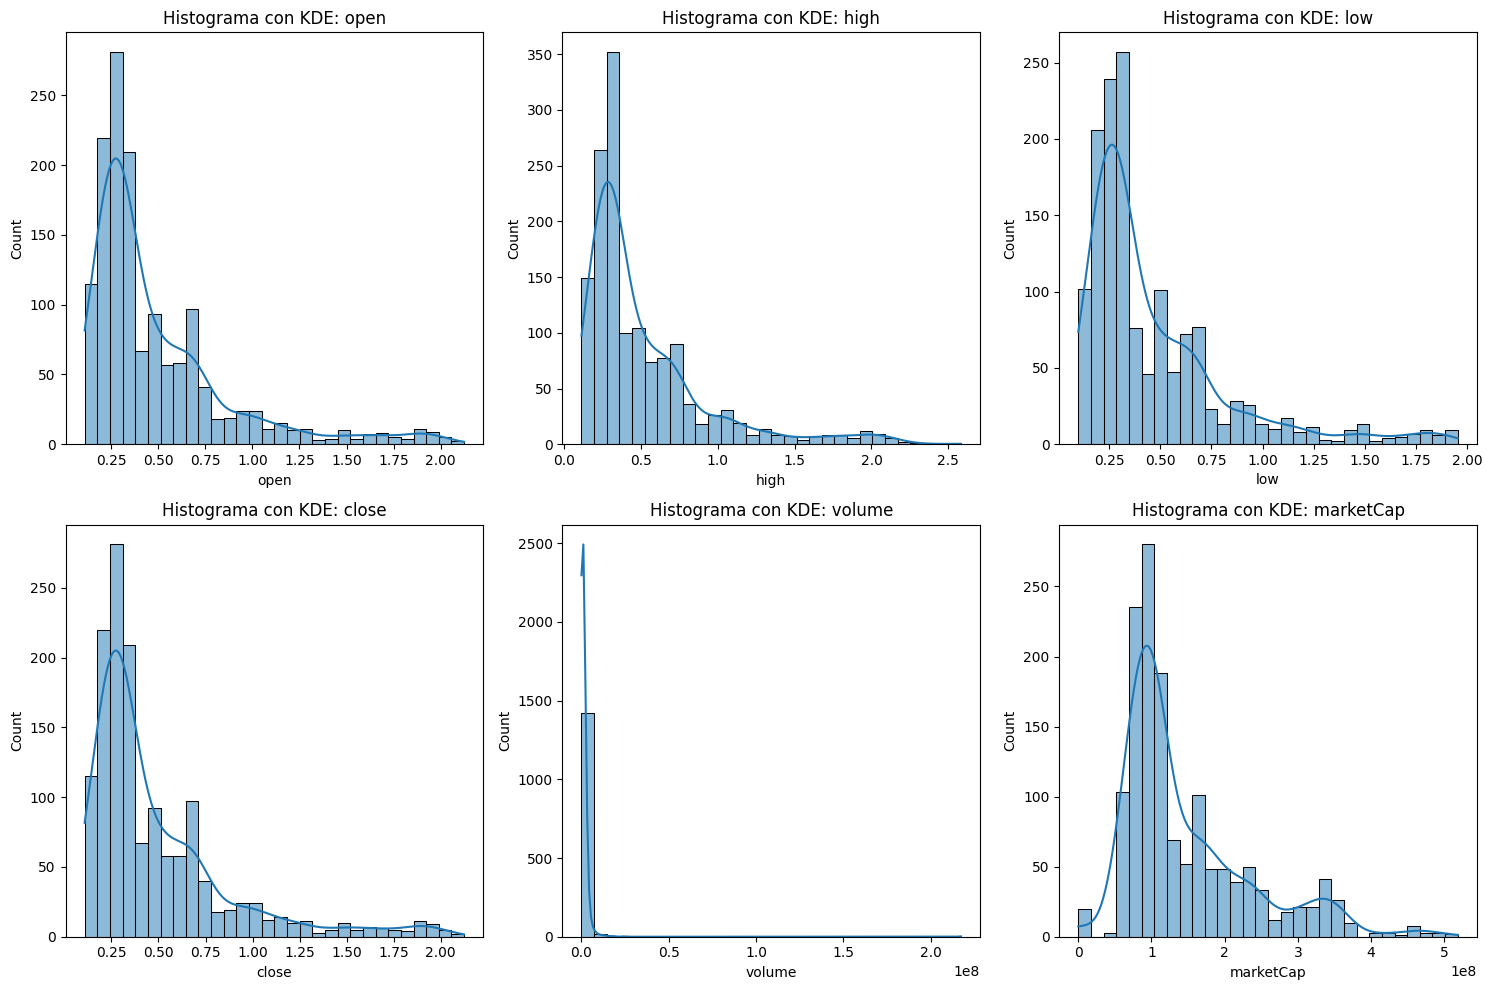

In [468]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[col], bins=30, kde=True, edgecolor='black')
    plt.title(f"Histograma con KDE: {col}")
plt.tight_layout()
plt.show()

| Variable    | Sesgada (Sí/No) | Tipo de Asimetría (Skew) | Rango Observado | Distribución      | Outliers Reales | ¿Aplicar log? | ¿Normalizar? | Tratamiento Recomendado                                    |
| ----------- | --------------- | ------------------------ | --------------- | ----------------- | --------------- | ------------- | ------------ | ---------------------------------------------------------- |
| `open`      | Sí              | Positiva (a la derecha)  | 0.2 – 1.0       | Sesgada           | No              | ❌             | ❌ (ya está)  | Mantener o aplicar `PowerTransformer` si se desea simetría |
| `high`      | Sí              | Positiva (a la derecha)  | 0.2 – 1.1       | Sesgada           | No              | ❌             | ❌ (ya está)  | Igual que `open`                                           |
| `low`       | Sí              | Positiva (a la derecha)  | 0.2 – 1.0       | Sesgada           | No              | ❌             | ❌ (ya está)  | Igual que `open`                                           |
| `close`     | Sí              | Positiva (a la derecha)  | 0.2 – 1.0       | Sesgada           | No              | ❌             | ❌ (ya está)  | Igual que `open`                                           |
| `volume`    | Sí (fuerte)     | Positiva extrema         | 0 – 2×10⁸       | Altamente sesgada | Sí              | ✔ `log1p`     | ✔            | Aplicar `log1p` + normalización o winsorizing              |
| `marketCap` | Sí (fuerte)     | Positiva extrema         | 0 – 5×10⁸       | Altamente sesgada | Sí              | ✔ `log1p`     | ✔            | Igual que `volume`                                         |




 🎯 Interpretación de la asimetría (skew)

* **Asimetría positiva (skew > 0)**: hay más valores pequeños y pocos valores grandes → la cola está a la derecha.
* **Asimetría negativa (skew < 0)**: hay más valores grandes y pocos pequeños → la cola está a la izquierda (no es el caso aquí).
* **Asimetría cercana a 0**: distribución simétrica (no aplica en tus datos actuales).




##### Graficando Pairplot

| Ventaja                               | Explicación                                                                                                                               |
| ------------------------------------- | ----------------------------------------------------------------------------------------------------------------------------------------- |
| 🔄 **Visualiza múltiples relaciones** | Muestra gráficos de dispersión para cada par de variables, permitiendo detectar correlaciones o patrones entre varias columnas numéricas. |
| 📊 **Distribución en la diagonal**    | Muestra histogramas o curvas de densidad en la diagonal para entender la distribución de cada variable individual.                        |
| 🧠 **Detección de outliers o grupos** | Permite identificar valores atípicos o posibles agrupaciones (clusters) al observar relaciones bidimensionales.                           |
| 🎨 **Fácil de personalizar**          | Puedes agregar colores según una variable categórica (`hue`) para explorar diferencias entre grupos.                                      |
| 💡 **Exploración rápida**             | Resume en un solo gráfico lo que tomaría muchos gráficos individuales hacer, lo que ahorra tiempo y da una visión general más clara.      |
                                   |


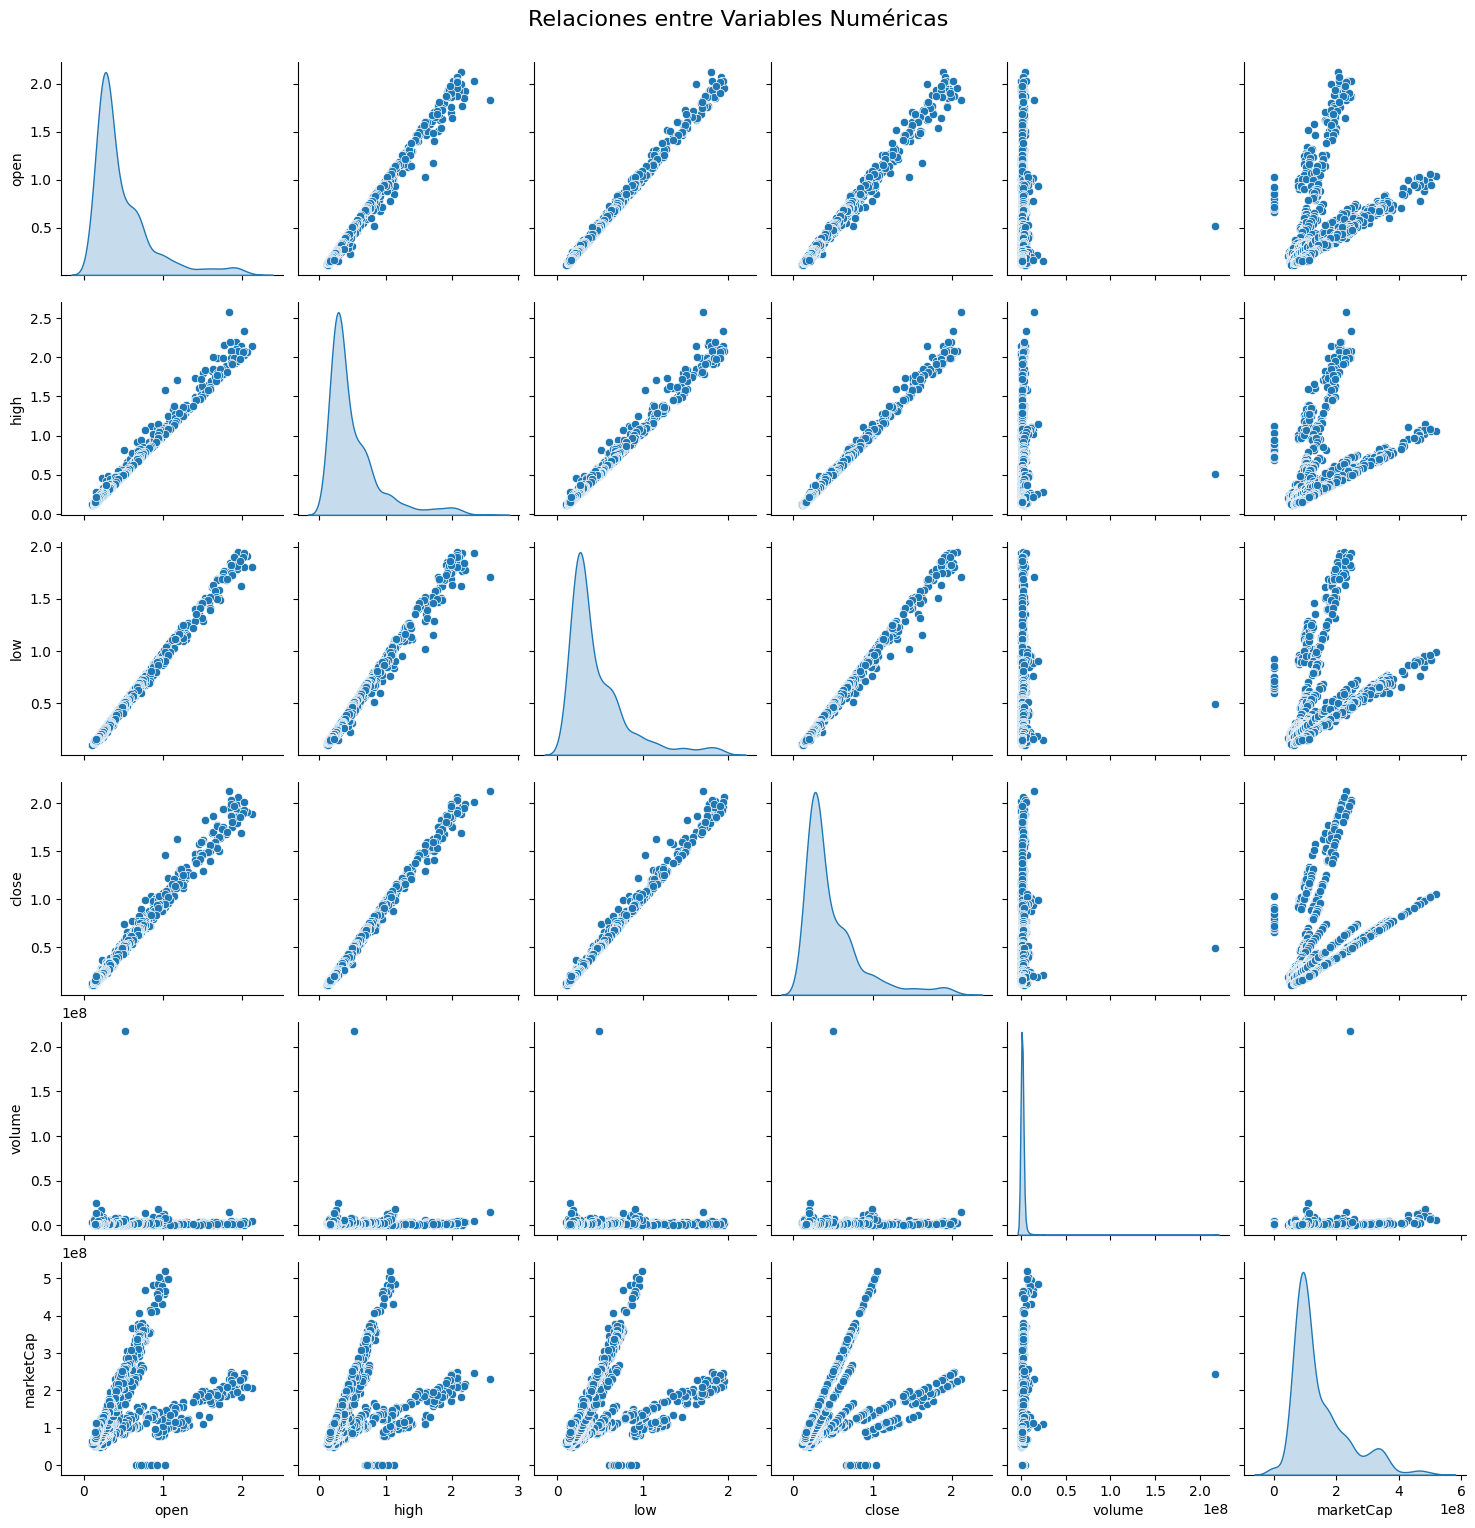

In [469]:
sns.pairplot(data[numeric_cols], diag_kind='kde')
plt.suptitle("Relaciones entre Variables Numéricas", fontsize=16, y=1.02)
plt.show()



✅ **Mejores combinaciones (para destacar en un cuadrado)**

1. **`open` vs `close`**

   * Altísima correlación. Ideal para modelos de predicción del cierre con apertura.
   * Útil para crear una variable de cambio diario (`close - open` o `% cambio`).

2. **`high` vs `low`**

   * También muy correlacionadas. Miden el rango de precios diario. Útil para estimar volatilidad.

3. **`open` vs `marketCap`** o **`close` vs `marketCap`**

   * Alta correlación (ya que `marketCap ≈ precio * suministro`). Puede servir para inferir tendencias generales.

4. **`volume` vs `marketCap`**

   * Aunque más dispersa, puede revelar momentos de sobrecompra/sobreventa.




## Limpieza de datos


Primero abordaremos el problema de los datos 0 en la columna marketcap

In [470]:
data['marketCap'] = data['marketCap'].replace(0, np.nan)
n = data['marketCap'].isna().cumprod().sum()
data = data.iloc[n:].reset_index(drop=True)

### Conclusion en general:

| Variable    | Tipo           | % Outliers | Distribución | Mejor Tratamiento                         | Justificación clave                                                                |
| ----------- | -------------- | ---------- | ------------ | ----------------------------------------- | ---------------------------------------------------------------------------------- |
| `open`      | Precio         | 1.59%      | Sesgada      | **IQR Capping**                           | Tiene pocos outliers, y la distribución no es severamente asimétrica.              |
| `high`      | Precio         | 1.67%      | Sesgada      | **IQR Capping**                           | Comportamiento similar al de apertura, con pocos valores extremos.                 |
| `low`       | Precio         | 1.42%      | Sesgada      | **IQR Capping**                           | Outliers mínimos pueden ser ruido, pero no representan un gran problema.           |
| `close`     | Precio         | 1.59%      | Sesgada      | **IQR Capping**                           | Repite el patrón de apertura y cierre; acotar mejora estabilidad sin distorsionar. |
| `volume`    | Volumen        | 6.85%      | Muy sesgada  | **log1p + IQR Capping (o Winsorización)** | Tiene valores extremadamente altos; se recomienda escalar y limitar.               |
| `marketCap` | Capitalización | 5.60%      | Muy sesgada  | **log1p + Winsorización**                 | Sesgo fuerte con outliers altos que pueden afectar el modelado.                    |


#### IQR Capping para open, high, low, close

In [471]:
for col in ['open', 'high', 'low', 'close']:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    data[col] = data[col].clip(lower=lower, upper=upper)

#### log1p + IQR Capping para volume

In [472]:
data['volume_log'] = np.log1p(data['volume'])

In [473]:
q1 = data['volume_log'].quantile(0.25)
q3 = data['volume_log'].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

data['volume_log'] = data['volume_log'].clip(lower=lower, upper=upper)

#### log1p + Winsorización para marketCap

In [474]:
from scipy.stats.mstats import winsorize

In [475]:
data['marketCap_log'] = np.log1p(data['marketCap'])

In [476]:
data['marketCap_log'] = winsorize(data['marketCap_log'], limits=[0.05, 0.05])

#### Eliminar solo las columnas originales transformadas

In [477]:
data.drop(columns=['volume', 'marketCap'], inplace=True)

In [478]:
data.head(-1)

,open,high,low,close,timestamp,volume_log,marketCap_log
0,0.899177,1.006647,0.875644,1.001213,2021-08-04 23:59:59.999000+00:00,13.731731,18.222792
1,1.000503,1.015743,0.952886,1.008229,2021-08-05 23:59:59.999000+00:00,13.294425,18.230246
2,1.009167,1.039124,0.961144,0.970035,2021-08-06 23:59:59.999000+00:00,13.584980,18.216175
3,0.969844,1.009587,0.925204,0.956226,2021-08-07 23:59:59.999000+00:00,13.562624,18.202207
4,0.956017,0.962150,0.895870,0.928109,2021-08-08 23:59:59.999000+00:00,13.338634,18.172780
...,...,...,...,...,...,...,...
1415,0.171802,0.183608,0.167320,0.167362,2025-06-19 23:59:59.999000+00:00,13.545267,18.355522
1416,0.167361,0.171724,0.161500,0.162862,2025-06-20 23:59:59.999000+00:00,12.880691,18.328345
1417,0.162862,0.165504,0.155131,0.157248,2025-06-21 23:59:59.999000+00:00,12.752461,18.293347
1418,0.157248,0.159123,0.139094,0.146956,2025-06-22 23:59:59.999000+00:00,13.300106,18.225762


## Resumen estadistico y de outliers

🧠 **Interpretación Final**

* El dataset ya **no presenta valores atípicos** que puedan distorsionar modelos estadísticos o de Machine Learning.
* Las distribuciones de todas las variables son **más equilibradas**, ideales para continuar con análisis exploratorio profundo, correlaciones o modelado predictivo.
* El tratamiento fue **eficaz y no destructivo**, conservando la información esencial.

### Estadistico

In [479]:
numericas_actual = data.select_dtypes(include='float64')

In [480]:
numericas_actual.describe()

,open,high,low,close,volume_log,marketCap_log
count,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000
mean,0.455515,0.476774,0.437684,0.454995,13.496922,18.671029
std,0.292173,0.304164,0.278091,0.291905,0.925443,0.493873
min,0.107602,0.114406,0.100133,0.107602,11.348156,17.983730
25%,0.248359,0.263570,0.239973,0.247515,12.752461,18.287024
50%,0.332259,0.345915,0.321117,0.332048,13.487931,18.513242
75%,0.612571,0.639728,0.585114,0.611917,14.121571,19.029792
max,1.158888,1.203965,1.102824,1.158519,16.175236,19.644384


| Variable                       | Observación Clave                                                                                                                                                                                          |
| ------------------------------ | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| `open`, `high`, `low`, `close` | Distribución contenida en un rango estrecho (\~0.1 a \~1.25), con valores centrales consistentes. Las medias y medianas son muy similares, lo que sugiere una buena simetría tras el tratamiento.          |
| `volume_log`                   | La transformación logarítmica fue efectiva: los valores están distribuidos entre \~11.3 y \~16.1, con desviación estándar moderada (\~0.91). La media y mediana están cerca, indicando reducción de sesgo. |
| `marketCap_log`                | También mejoró significativamente: rango de \~17.9 a \~19.7, con menor dispersión (\~0.50). Esto facilita su uso en modelos al reducir el efecto de los outliers y escalar la magnitud.                    |


### Outliers

In [481]:
numericas_actual_out = data.select_dtypes(include='number')

In [482]:
outliers_info = {}

for col in numericas_actual_out.columns:
    Q1 = numericas_actual_out[col].quantile(0.25)
    Q3 = numericas_actual_out[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = numericas_actual_out[(numericas_actual_out[col] < lower_bound) | (numericas_actual_out[col] > upper_bound)]
    cantidad = outliers.shape[0]
    porcentaje = (cantidad / len(numericas_actual_out)) * 100

    outliers_info[col] = {
        'Cantidad Outliers': cantidad,
        'Porcentaje Outliers (%)': round(porcentaje, 2)
    }

outliers_df = pd.DataFrame(outliers_info).T
print(outliers_df)

               Cantidad Outliers  Porcentaje Outliers (%)
open                         0.0                      0.0
high                         0.0                      0.0
low                          0.0                      0.0
close                        0.0                      0.0
volume_log                   0.0                      0.0
marketCap_log                0.0                      0.0


| Variable                       | Resultado Final                                                                                                                                         |
| ------------------------------ | ------------------------------------------------------------------------------------------------------------------------------------------------------- |
| `open`, `high`, `low`, `close` | **0% outliers** después del IQR Capping. Las distribuciones ahora están controladas sin pérdida significativa de datos.                                 |
| `volume_log`, `marketCap_log`  | **0% outliers** gracias a la combinación de **log-transformación + winsorización/capping**, lo que estabilizó la escala y eliminó los valores extremos. |


## Analisis Visual

In [483]:
numeric_cols = ['open', 'high', 'low', 'close', 'volume_log', 'marketCap_log']

##### Boxplots (Distribución y Outliers)

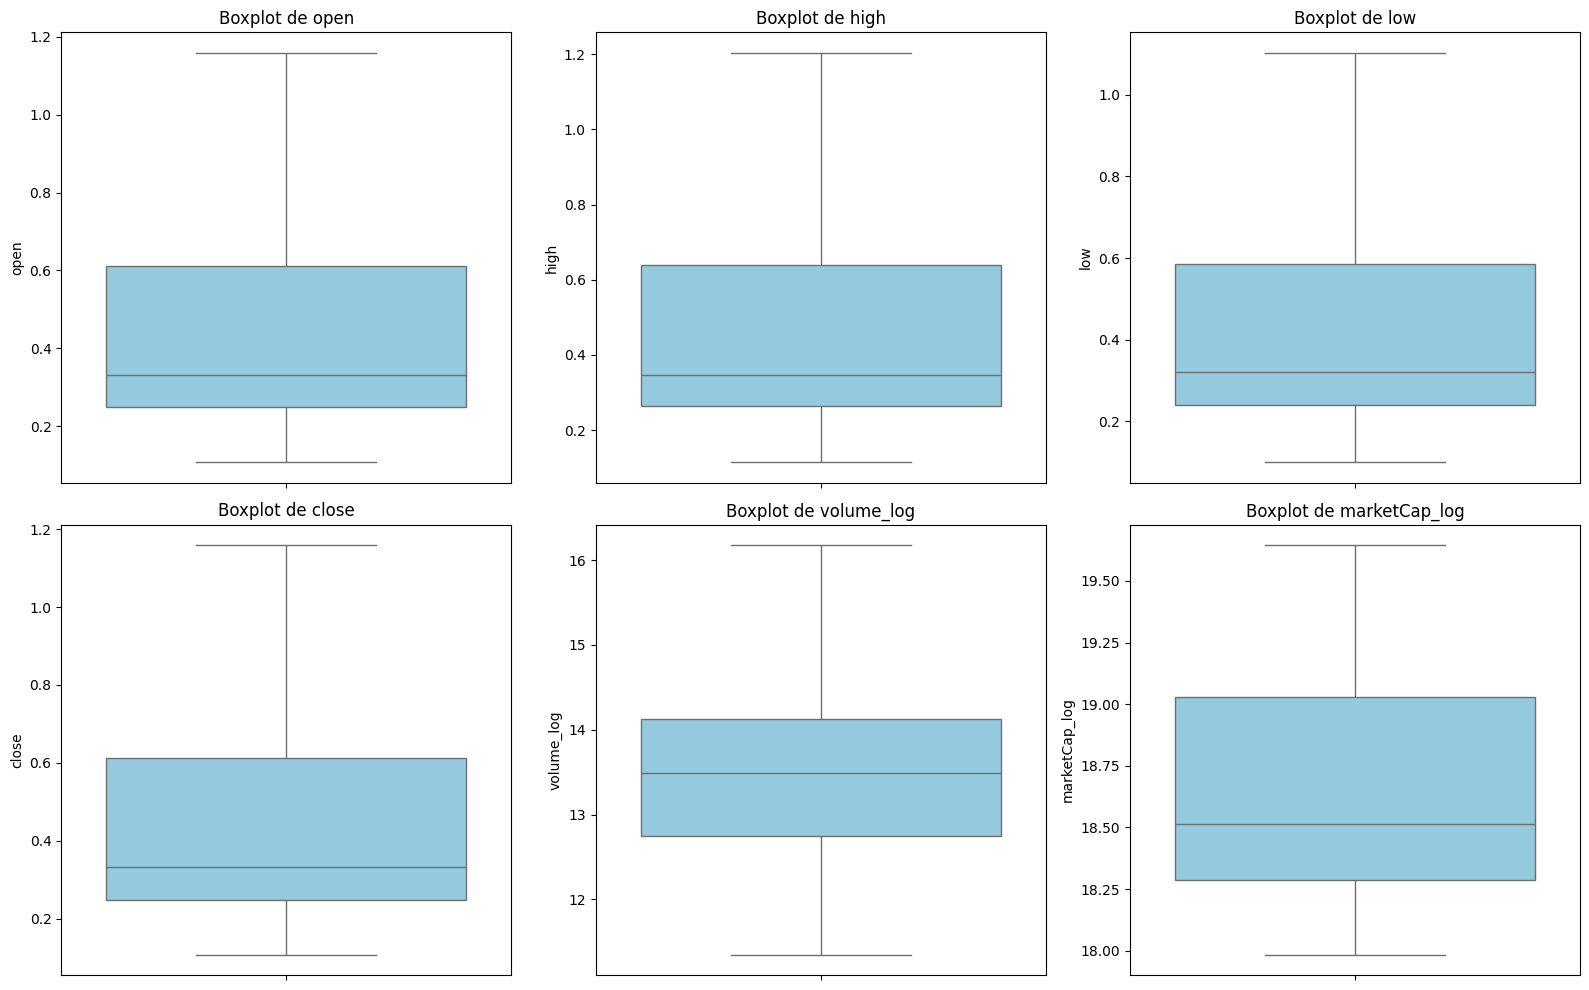

In [484]:
plt.figure(figsize=(16, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=data[col], color='skyblue')
    plt.title(f'Boxplot de {col}')
    plt.tight_layout()

plt.show()

✅ **Variables sin outliers evidentes (datos limpios)**:

* `open`, `high`, `low`, `close`:

  * Las cuatro variables de precios muestran distribuciones bastante simétricas y sin valores atípicos (outliers) extremos.
  * Esto indica datos **limpios y consistentes** para entrenamiento de modelos o análisis de series temporales.
  * Los valores están dentro del rango esperado para precios de una criptomoneda que opera entre 0.1 y 0.9.

✅ **Variables transformadas (log) también limpias**:

* `volume_log` y `marketCap_log`:

  * La transformación logarítmica ha sido efectiva:

    * Comprime la escala y reduce el impacto de posibles outliers.
    * Hace que la distribución sea más simétrica y adecuada para modelos lineales o redes neuronales.
  * No se observan valores extremos fuera de los bigotes.

📌 **Conclusión general**:

* **Los datos están bien preprocesados y limpios**.
* Puede proceder a:

  * **Crear features** como cambios diarios (`close - open`), rangos (`high - low`), o diferencias de logs.
  * **Entrenar modelos sin preocuparte por outliers** extremos que afecten el desempeño.



##### Curvas de densidad (KDE)

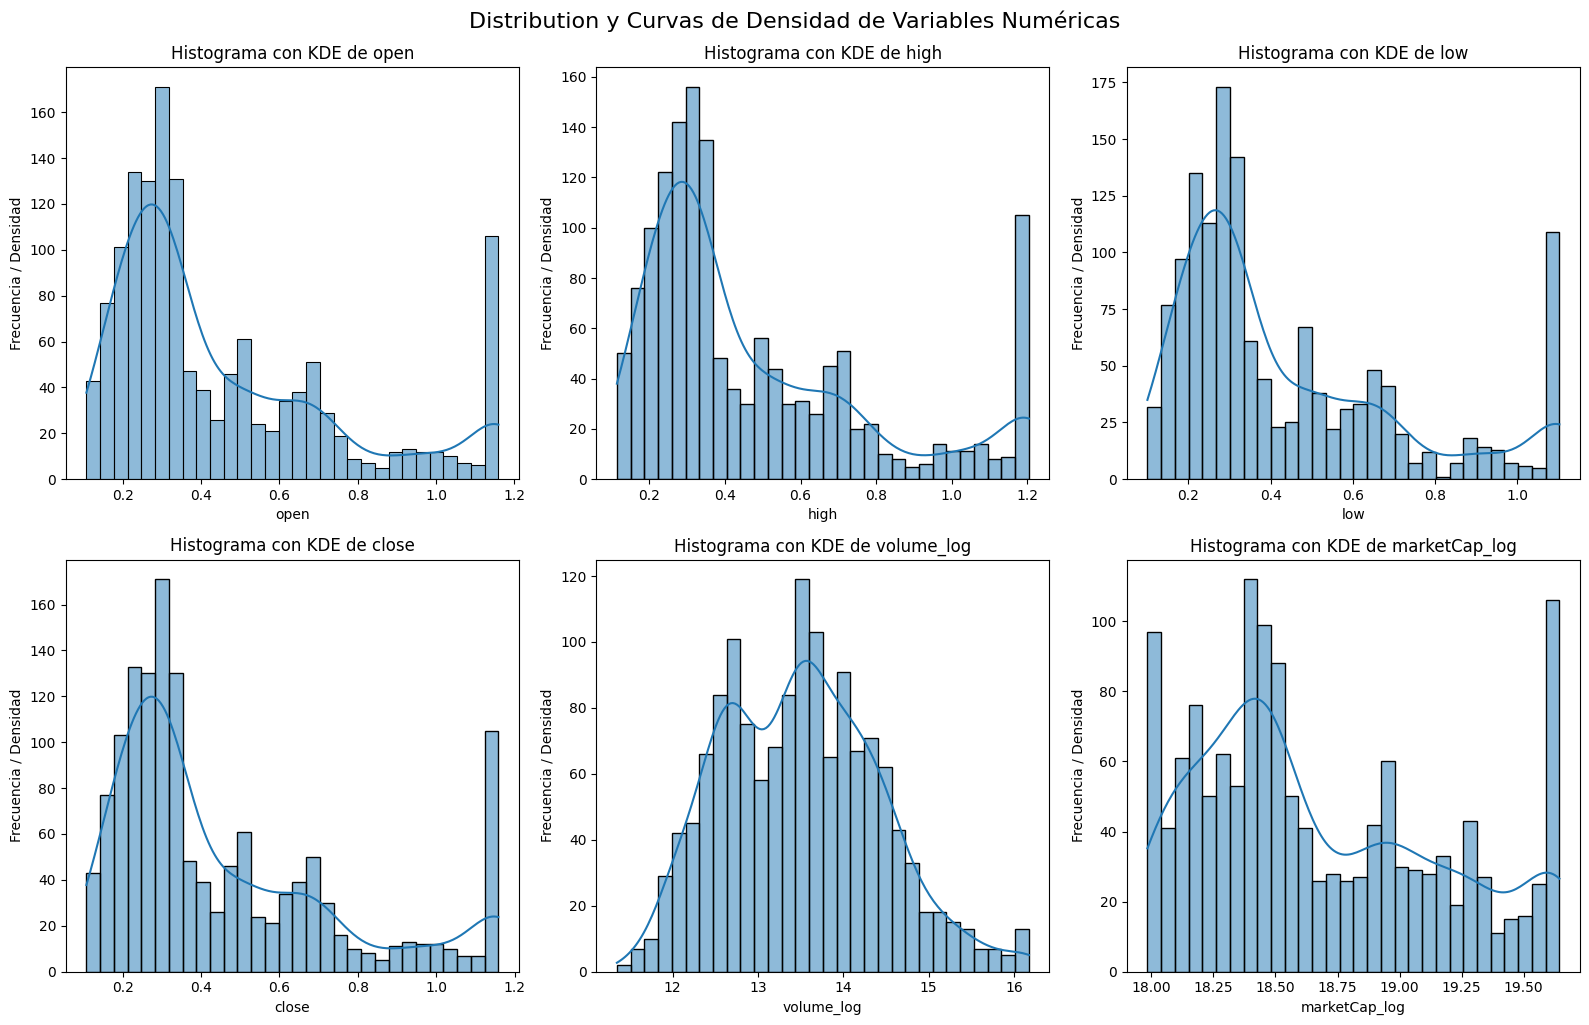

In [485]:
plt.figure(figsize=(16, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=data, x=col, bins=30, kde=True, edgecolor='black')
    plt.title(f'Histograma con KDE de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia / Densidad')
    plt.tight_layout()

plt.suptitle("Distribution y Curvas de Densidad de Variables Numéricas", y=1.02, fontsize=16)
plt.show()

 Conclusión General:
- ✅ No hay outliers según los métodos estadísticos aplicados.

- 🧹 No se requiere limpieza adicional ni transformación de variables.

- 📉 Las variables de precios (open, high, low, close) tienen distribución asimétrica pero dentro de rangos normales.

- 🔍 La bimodalidad observada en marketCap_log y volume_log sugiere diferentes comportamientos del mercado. Podrías aplicar clustering (como K-means o DBSCAN) para analizar estos grupos.

- 🧠 Estos datos están listos para modelado, como regresiones, predicción de precios o análisis de tendencias.

##### Grafica de dispersion entre variables numericas

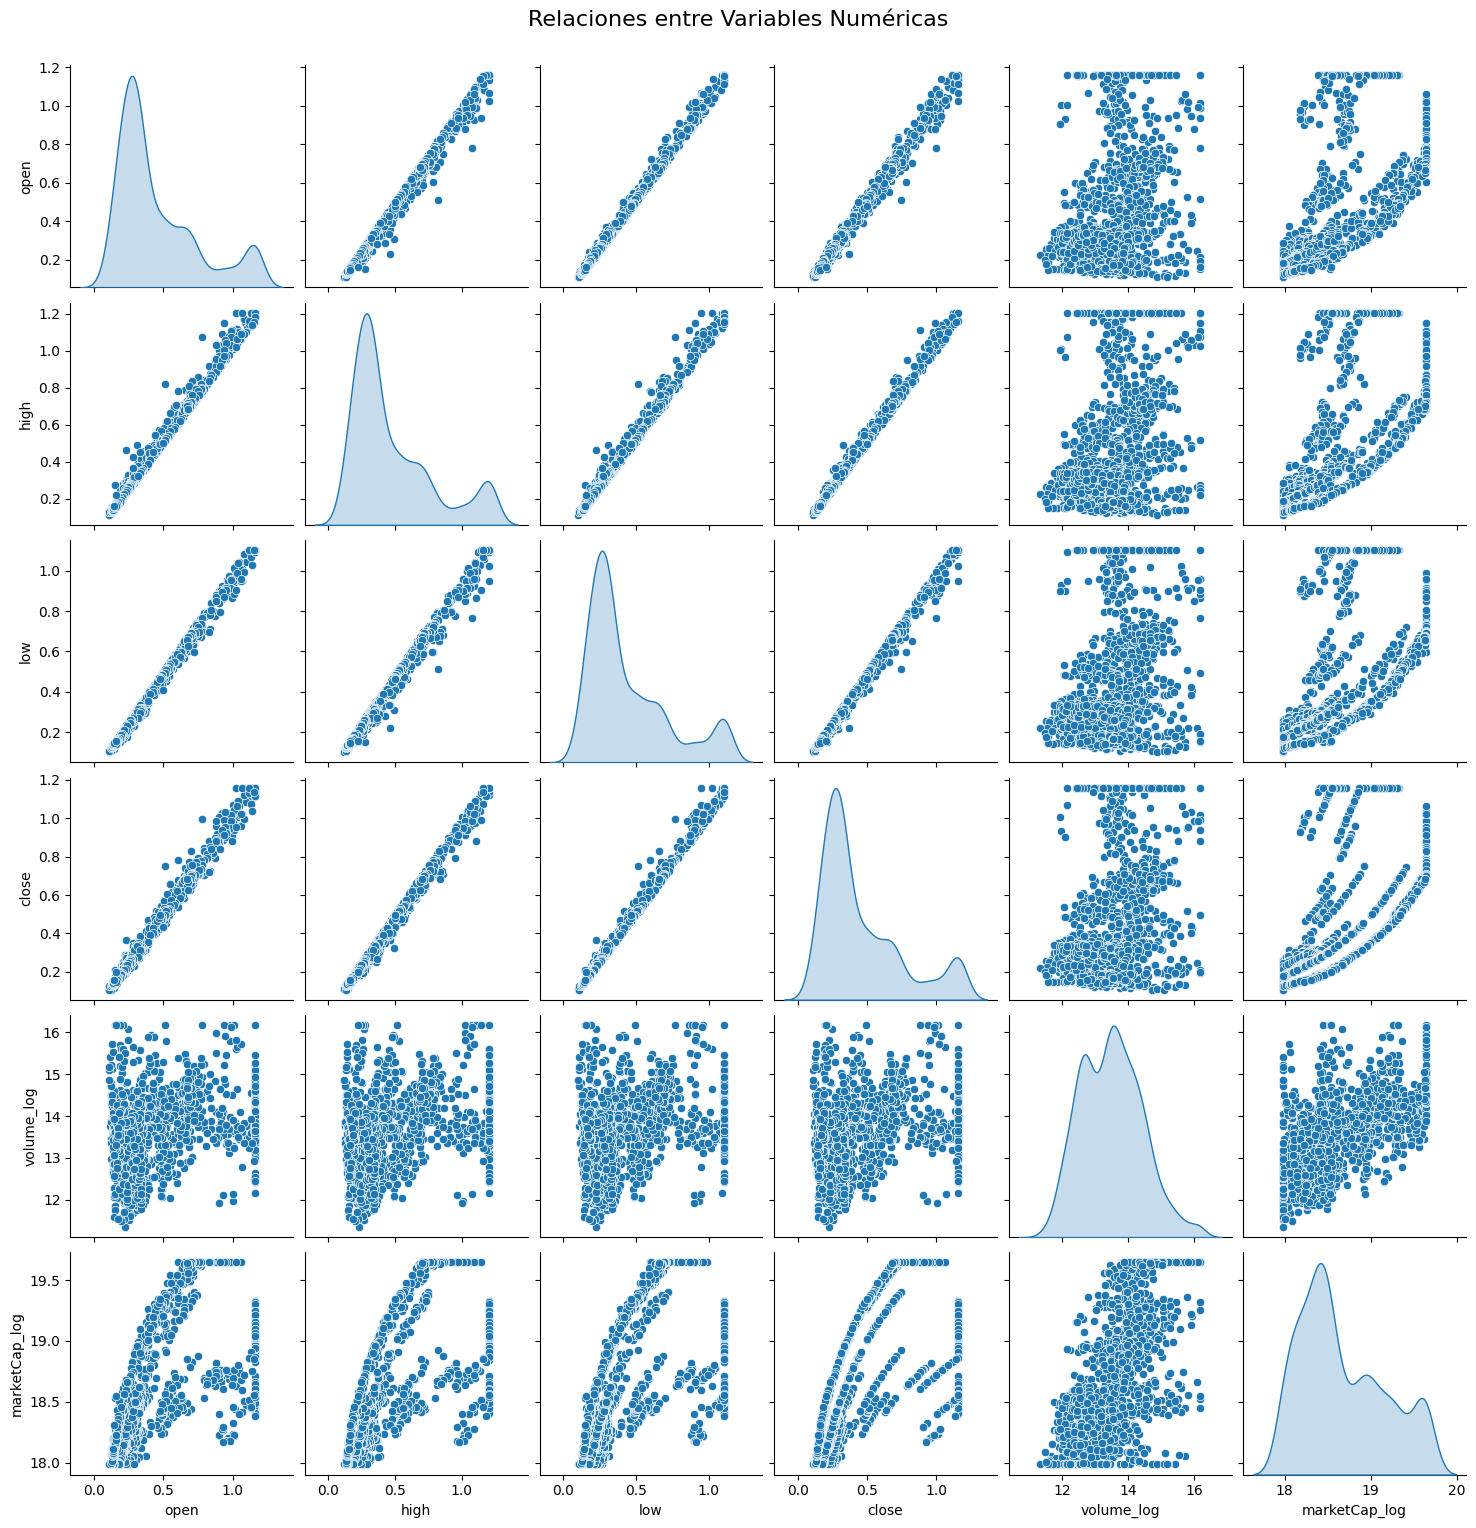

In [486]:
sns.pairplot(data[numeric_cols], diag_kind='kde')
plt.suptitle("Relaciones entre Variables Numéricas", fontsize=16, y=1.02)
plt.show()

 📊 **Conclusiones del Análisis de Relaciones entre Variables Numéricas:**

1. **Fuerte correlación entre precios (`open`, `high`, `low`, `close`)**:

   * Se observa una **alta correlación lineal positiva** entre los precios de apertura, cierre, máximo y mínimo. Esto es esperable, ya que los precios diarios suelen moverse en conjunto. Las gráficas muestran alineaciones muy estrechas, lo que indica consistencia en los movimientos de precios.

2. **Relaciones no lineales con `volume_log` y `marketCap_log`**:

   * Las variables transformadas con logaritmos (`volume_log`, `marketCap_log`) no presentan relaciones lineales fuertes con los precios, aunque hay **ciertas curvas suaves** que indican que podría existir alguna relación no lineal o con cierta estacionalidad.

3. **Distribuciones suaves y normales sin presencia de outliers**:

   * Las distribuciones en la diagonal muestran que tras la normalización y limpieza, los datos siguen una distribución **relativamente normal y continua**, sin valores extremos ni anomalías.
   * Confirmado también por la tabla: **0% de outliers** en todas las variables.

4. **`marketCap_log` tiene una distribución más concentrada que `volume_log`**:

   * La distribución de `marketCap_log` es más sesgada y concentrada, lo que indica menor variabilidad relativa comparada con el volumen.




##### Matriz de correlación

In [487]:
correlation_matrix = data[numeric_cols].corr(method='pearson')

In [488]:
print(correlation_matrix)

                   open      high       low     close  volume_log  \
open           1.000000  0.996446  0.998487  0.996186    0.394362   
high           0.996446  1.000000  0.996213  0.997912    0.414261   
low            0.998487  0.996213  1.000000  0.997756    0.389239   
close          0.996186  0.997912  0.997756  1.000000    0.400143   
volume_log     0.394362  0.414261  0.389239  0.400143    1.000000   
marketCap_log  0.564657  0.566387  0.568552  0.568221    0.582426   

               marketCap_log  
open                0.564657  
high                0.566387  
low                 0.568552  
close               0.568221  
volume_log          0.582426  
marketCap_log       1.000000  


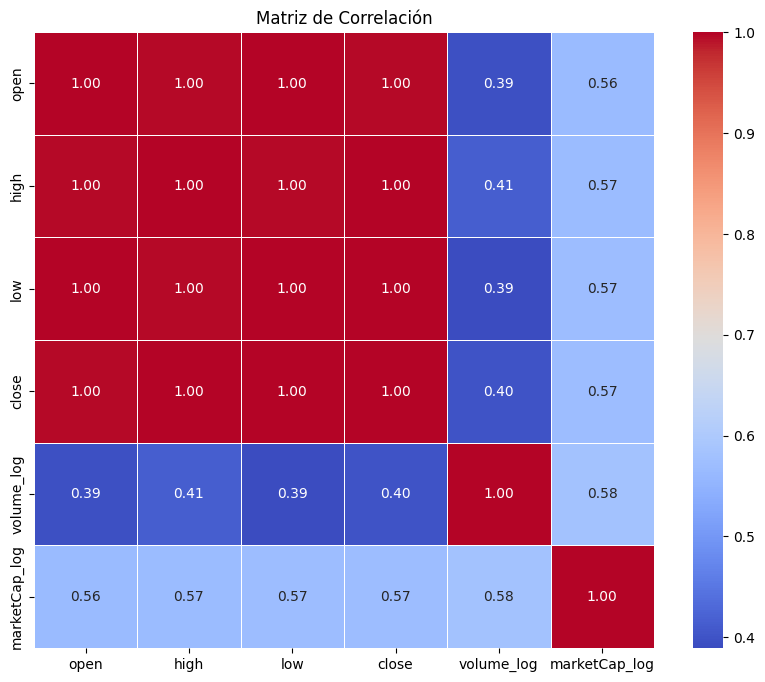

In [489]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

| Característica                              | Pearson                                                                                                               | Spearman                       | Kendall                         |
| ------------------------------------------- | --------------------------------------------------------------------------------------------------------------------- | ------------------------------ | ------------------------------- |
| **Qué mide**                                | Relación **lineal** entre variables                                                                                   | Relación **monótona** (rangos) | Relación monótona (pares orden) |
| **Asume datos normales / homocedasticidad** | ✔️ Ideal si las variables se aproximan a normalidad                                                                   | ❌ No la requiere               | ❌ No la requiere                |
| **Sensibilidad a outliers**                 | 🔶 Alta (los valores extremos distorsionan)                                                                           | ⚪️ Moderada                    | ⚪️ Moderada                     |
| **Robustez ante empates o datos discretos** | ❌ Pobre                                                                                                               | ✔️ Buena                       | ✔️ Excelente                    |
| **Captura dependencia no lineal**           | ❌ Solo lineal                                                                                                         | ⚪️ Detecta monotonicidad       | ⚪️ Detecta monotonicidad        |
| **Recomendado para tu caso**                | ✔️ Variables **log-transformadas**, normalizadas y con outliers ya tratados, donde buscas relaciones lineales claras. | ❌ Menos necesario aquí         | ❌ Menos necesario aquí          |



**Por qué Pearson en el proyecto**

* Tras aplicar **log1p**, IQR capping y winsorización, las variables (`open`, `high`, `low`, `close`, `volume_log`, `marketCap_log`) se acercan a una distribución más normal y sin outliers, cumpliendo los supuestos de Pearson.
* Buscas medir la **fuerza y dirección** de la relación lineal entre precio, volumen y capitalización en un contexto financiero, donde la linealidad es un indicador útil.
* Modelos futuros (regresiones, PCA, redes neuronales) se benefician de conocer estas relaciones lineales de manera directa.


 📈 **Conclusiones de la Matriz de Correlación:**

1. **Correlación casi perfecta entre los precios (`open`, `high`, `low`, `close`)**:

   * Todas estas variables tienen coeficientes de correlación cercanos a **1.00**, lo que indica una relación **lineal extremadamente fuerte**. Este resultado es coherente con la naturaleza del mercado financiero, donde los precios diarios se mueven en conjunto.
   * Ejemplo: `close` con `low` = 1.00, `open` con `high` = 0.99.

2. **`marketCap_log` tiene alta correlación con precios**:

   * La capitalización de mercado transformada con logaritmos tiene una **alta correlación con los precios** (`≈0.84 - 0.85`). Esto es lógico, ya que el market cap depende directamente del precio.
   * Esto sugiere que **cualquier modelo de predicción del marketCap podría beneficiarse al incluir los precios como variables explicativas**.

3. **`volume_log` muestra correlaciones medias con los precios (\~0.49 - 0.52)**:

   * Aunque más débiles, estas correlaciones indican que el volumen tiene cierta relación con los precios, pero **no es tan fuerte como el marketCap**.
   * La correlación con `marketCap_log` también es moderada (**0.64**), lo cual puede indicar que en esta criptomoneda el volumen no siempre acompaña al valor total del mercado.

4.  Conclusión sobre `volume_log`:
* La variable volume_log está bien transformada y lista para análisis. Su distribución es adecuada y sin outliers, lo que mejora la estabilidad y eficacia de modelos predictivos. Aunque no tiene una correlación fuerte con los precios, su comportamiento moderadamente correlacionado con el marketCap_log la convierte en una variable útil para analizar la actividad del mercado y la liquidez de la criptomoneda.


### Resumen del Proceso:



1. **Limpieza de outliers**

   * Precios (`open`, `high`, `low`, `close`): se aplicó IQR Capping y quedaron sin valores atípicos.
   * Volumen y capitalización (`volume_log`, `marketCap_log`): se usó `log1p` + winsorización/capping, eliminando todos los outliers.

2. **Transformaciones**

   * `volume` y `marketCap` pasaron a escala logarítmica, reduciendo asimetría y homogeneizando la escala de las variables.

3. **Análisis visual**

   * **Boxplots**, **histogramas con KDE**, **scatterplots** y **heatmap de correlación** confirman datos limpios, distribuciones razonables y relaciones fuertes entre los precios (≈0.99) y moderadas entre precio/volumen (≈0.5) y precio/marketCap (≈0.85).


# Data Final

| **Columna**     | **Significado**                                                                                                                                      |
| --------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------- |
| `open`          | Precio de apertura del día: primer precio al que se negoció CFG en la jornada.                                                                       |
| `high`          | Precio máximo del día: valor más alto alcanzado durante la sesión de trading.                                                                        |
| `low`           | Precio mínimo del día: valor más bajo alcanzado durante la sesión de trading.                                                                        |
| `close`         | Precio de cierre del día: último precio registrado al finalizar la jornada (marca el valor de referencia para el siguiente día).                     |
| `timestamp`     | Fecha y hora en que se registró el precio de cierre (en formato UTC).                                                                                |
| `volume_log`    | Volumen de transacciones diario transformado con `log1p` (log(1 + volumen)) para reducir sesgos y escala del dato original.                          |
| `marketCap_log` | Capitalización de mercado diaria transformada con `log1p` (log(1 + marketCap)) para homogeneizar la escala y atenuar el impacto de valores extremos. |


In [490]:
data.head(-1)

,open,high,low,close,timestamp,volume_log,marketCap_log
0,0.899177,1.006647,0.875644,1.001213,2021-08-04 23:59:59.999000+00:00,13.731731,18.222792
1,1.000503,1.015743,0.952886,1.008229,2021-08-05 23:59:59.999000+00:00,13.294425,18.230246
2,1.009167,1.039124,0.961144,0.970035,2021-08-06 23:59:59.999000+00:00,13.584980,18.216175
3,0.969844,1.009587,0.925204,0.956226,2021-08-07 23:59:59.999000+00:00,13.562624,18.202207
4,0.956017,0.962150,0.895870,0.928109,2021-08-08 23:59:59.999000+00:00,13.338634,18.172780
...,...,...,...,...,...,...,...
1415,0.171802,0.183608,0.167320,0.167362,2025-06-19 23:59:59.999000+00:00,13.545267,18.355522
1416,0.167361,0.171724,0.161500,0.162862,2025-06-20 23:59:59.999000+00:00,12.880691,18.328345
1417,0.162862,0.165504,0.155131,0.157248,2025-06-21 23:59:59.999000+00:00,12.752461,18.293347
1418,0.157248,0.159123,0.139094,0.146956,2025-06-22 23:59:59.999000+00:00,13.300106,18.225762


In [ ]:
#new_data = pd.DataFrame(data)

In [ ]:
#data.to_csv('Data/new_data.csv', index=False)
data = pd.read_csv('Data/new_data.csv')

# Posibles Features

| **Nueva Columna**      | **Derivación**                  | **Por qué es útil**                                                                             |
| ---------------------- | ------------------------------- | ----------------------------------------------------------------------------------------------- |
| `daily_return`         | `(close - open) / open`         | Captura el **rendimiento diario** de la moneda, clave para predecir tendencias de precio.       |
| `log_return`           | `np.log(close) - np.log(open)`  | Retorno logarítmico con mejor **aproximación normal**, útil en muchos modelos financieros.      |
| `price_range_pct`      | `(high - low) / open`           | Mide la **volatilidad intradía** en un solo valor normalizado.                                  |
| `std_return_7d`        | `daily_return.rolling(7).std()` | Desviación estándar móvil de retornos (7 días), refleja la **volatilidad reciente**.            |
| `ma_close_7d`          | `close.rolling(7).mean()`       | Media móvil a 7 días del precio de cierre, suaviza ruido y muestra **tendencia a corto plazo**. |
| `ma_close_30d`         | `close.rolling(30).mean()`      | Media móvil a 30 días, detecta **tendencia a mediano/largo plazo**.                             |
| `momentum_7d`          | `close - close.shift(7)`        | Medida de **momentum**, cuánto ha cambiado el precio en la última semana.                       |
| `volume_log_change`    | `volume_log.diff()`             | Varia­ción diaria del volumen (log), ayuda a detectar **picos o caídas repentinas** de trading. |
| `volume_log_ma_7d`     | `volume_log.rolling(7).mean()`  | Suaviza el volumen para identificar **tendencias de interés** en el mercado.                    |
| `marketcap_log_change` | `marketCap_log.diff()`          | Cambio diario en capitalización (log), indicador de **flujo de inversión**.                     |
| `liq_ratio`            | `volume_log / marketCap_log`    | Relación entre volumen y capitalización, mide la **liquidez relativa** de la criptomoneda.      |


**¿Por qué crear estas features?**

* **Rendimiento y momentum** (`daily_return`, `log_return`, `momentum_7d`): ayudan a tu modelo a aprender la dirección y velocidad de los movimientos de precio.
* **Volatilidad** (`price_range_pct`, `std_return_7d`): es un factor clave en finanzas para cuantificar riesgo.
* **Tendencia** (`ma_close_7d`, `ma_close_30d`): media móvil te permite diferenciar ruido de patrones reales de subida o bajada.
* **Actividad de mercado** (`volume_log_change`, `volume_log_ma_7d`, `marketcap_log_change`, `liq_ratio`): todas estas capturan cambios y niveles de participación que a menudo anticipan giros de precio.

Con estas nuevas columnas tendre un **set de features mucho más rico** que cubre precio, volatilidad, momentum y volumen, lo que suele mejorar significativamente el desempeño de modelos de regresión, clasificación de tendencias, o incluso modelos de series temporales avanzados.


In [493]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   open           1421 non-null   float64
 1   high           1421 non-null   float64
 2   low            1421 non-null   float64
 3   close          1421 non-null   float64
 4   timestamp      1421 non-null   object 
 5   volume_log     1421 non-null   float64
 6   marketCap_log  1421 non-null   float64
dtypes: float64(6), object(1)
memory usage: 77.8+ KB


In [494]:
data.tail()

,open,high,low,close,timestamp,volume_log,marketCap_log
1416,0.167361,0.171724,0.161500,0.162862,2025-06-20 23:59:59.999000+00:00,12.880691,18.328345
1417,0.162862,0.165504,0.155131,0.157248,2025-06-21 23:59:59.999000+00:00,12.752461,18.293347
1418,0.157248,0.159123,0.139094,0.146956,2025-06-22 23:59:59.999000+00:00,13.300106,18.225762
1419,0.146956,0.159485,0.145891,0.159236,2025-06-23 23:59:59.999000+00:00,13.922737,18.306124
1420,0.159236,0.221995,0.157215,0.201760,2025-06-24 23:59:59.999000+00:00,16.175236,18.542870


In [495]:
data["timestamp"] = pd.to_datetime(data["timestamp"], utc=True)

In [496]:
data.set_index("timestamp", inplace=True)

In [498]:
def create_features(df):
    df = df.copy()
    df['year'] = df.index.year
    df['month'] = df.index.month
    df['day'] = df.index.day
    df['day_of_week'] = df.index.dayofweek
    df["quarter"] = df.index.quarter
    return df

In [499]:
data = create_features(data)

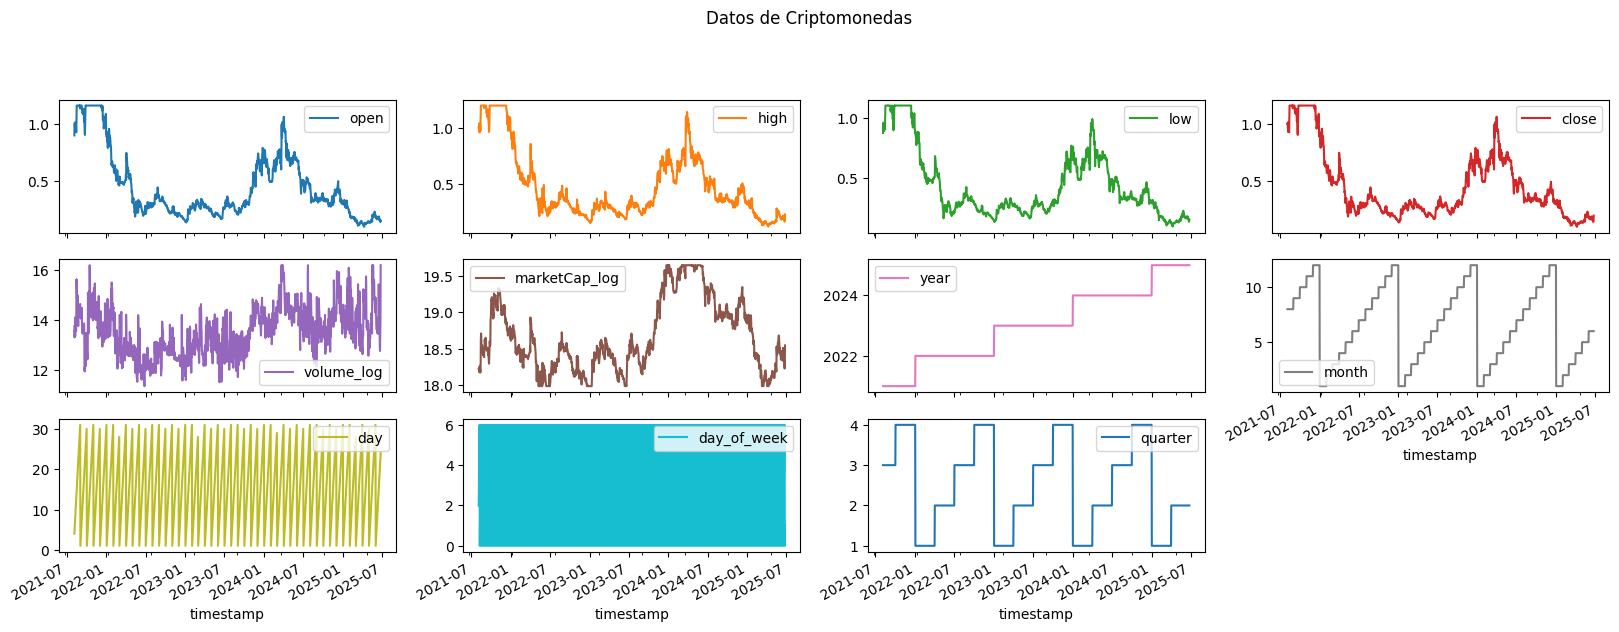

In [501]:
data.plot(figsize=(20, 9), title='Datos de Criptomonedas', subplots=True, layout=(4, 4), sharex=True)

#plt.gcf().autofmt_xdate()
plt.xlabel('Fecha')
plt.show()

In [502]:
train = data.loc[data.index < '10-01-2024']
test = data.loc[data.index >= '10-01-2024']
print(train.shape, test.shape)


(1154, 11) (267, 11)


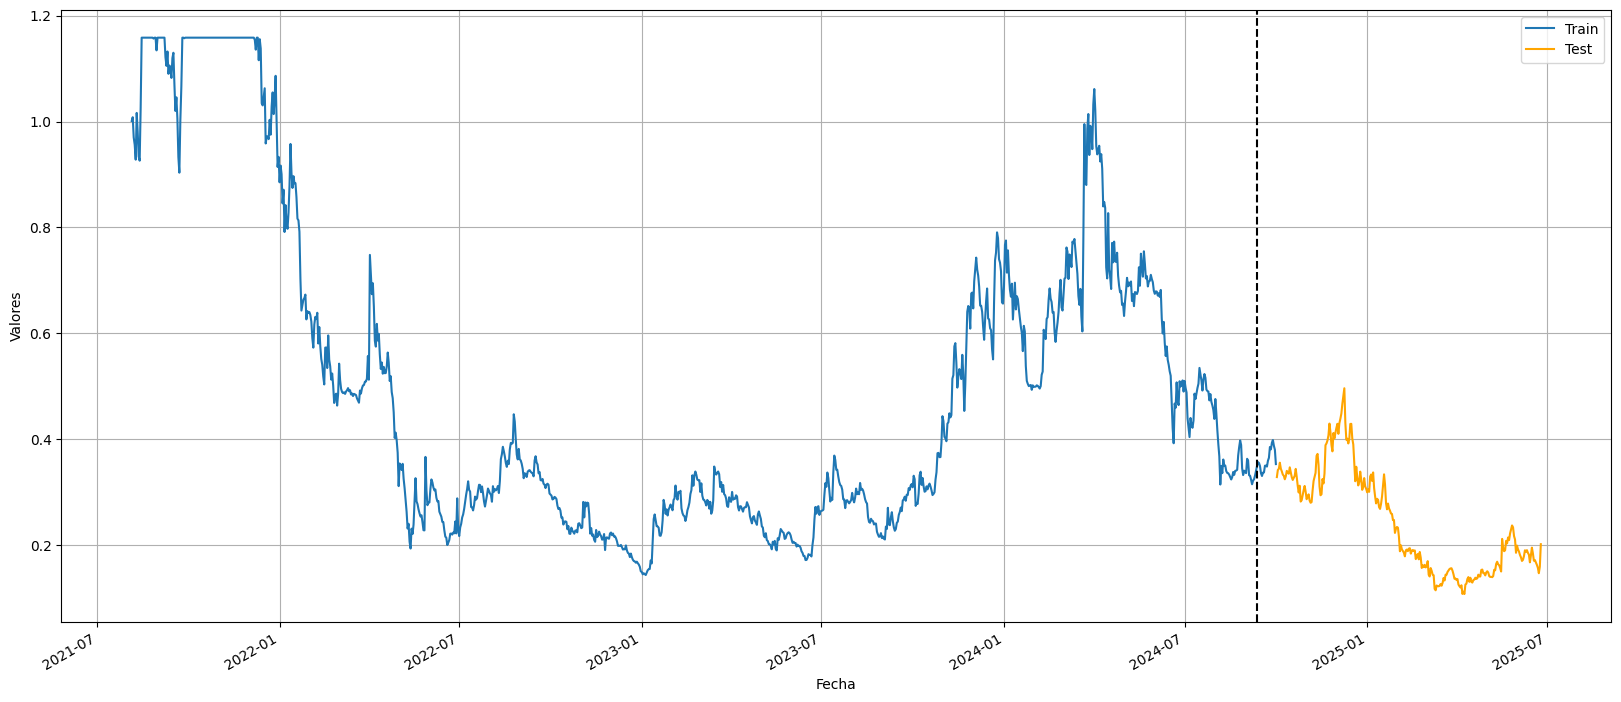

In [503]:

fig, ax = plt.subplots(figsize=(20, 9))
train["close"].plot(ax=ax)
test["close"].plot(ax=ax, color='orange')
ax.set_xlabel('Fecha')
ax.set_ylabel('Valores')
ax.axvline(pd.to_datetime('2024-09-12'), color='black', linestyle='--')
plt.legend(["Train", "Test"])
plt.grid()
plt.show()

<Axes: title={'center': 'Week of Data'}, xlabel='timestamp'>

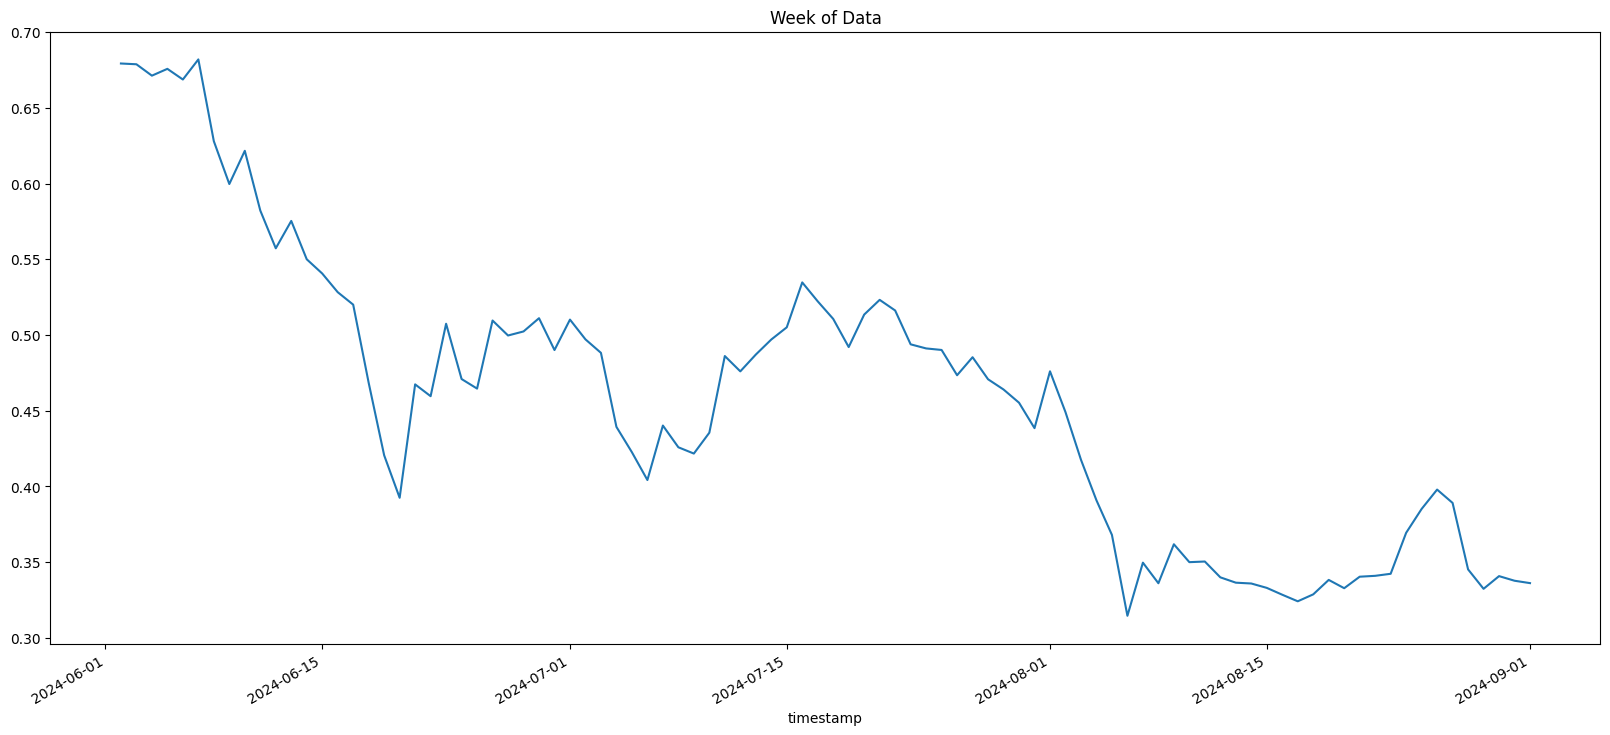

In [504]:
data["close"].loc[(data.index > '06-01-2024')&(data.index < '09-01-24')].plot(figsize=(20, 9),title="Week of Data")

In [505]:
data.columns

Index(['open', 'high', 'low', 'close', 'volume_log', 'marketCap_log', 'year',
       'month', 'day', 'day_of_week', 'quarter'],
      dtype='object')

In [530]:
FeaturesTrain = ['volume_log', 'marketCap_log', 'year','month', 'day', 'day_of_week', 'quarter']
FeaturesTest = ['volume_log', 'marketCap_log', 'year','month', 'day', 'day_of_week', 'quarter']
Target = 'close'

In [531]:
x_train = train[FeaturesTrain]
y_train = train[Target]

x_test = test[FeaturesTest]
y_test = test[Target]

In [532]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error 

reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, learning_rate=0.01, max_depth=5, early_stopping_rounds=50)


In [534]:
reg.fit(x_train, y_train,eval_set=[(x_train, y_train), (x_test, y_test)], verbose=50)

[0]	validation_0-rmse:0.29669	validation_1-rmse:0.27830


[50]	validation_0-rmse:0.18504	validation_1-rmse:0.20812
[100]	validation_0-rmse:0.11723	validation_1-rmse:0.16785
[150]	validation_0-rmse:0.07524	validation_1-rmse:0.14090
[200]	validation_0-rmse:0.04976	validation_1-rmse:0.12568
[250]	validation_0-rmse:0.03479	validation_1-rmse:0.11648
[300]	validation_0-rmse:0.02593	validation_1-rmse:0.11182
[350]	validation_0-rmse:0.02081	validation_1-rmse:0.10922
[400]	validation_0-rmse:0.01786	validation_1-rmse:0.10637
[450]	validation_0-rmse:0.01612	validation_1-rmse:0.10339
[500]	validation_0-rmse:0.01496	validation_1-rmse:0.10119
[550]	validation_0-rmse:0.01405	validation_1-rmse:0.09964
[600]	validation_0-rmse:0.01330	validation_1-rmse:0.09761
[650]	validation_0-rmse:0.01275	validation_1-rmse:0.09694
[700]	validation_0-rmse:0.01223	validation_1-rmse:0.09652
[750]	validation_0-rmse:0.01164	validation_1-rmse:0.09624
[800]	validation_0-rmse:0.01109	validation_1-rmse:0.09583
[850]	validation_0-rmse:0.01053	validation_1-rmse:0.09551
[900]	validatio

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [535]:
fi = pd.DataFrame(data=reg.feature_importances_,
                  index=reg.feature_names_in_,
                  columns=['Importance'])

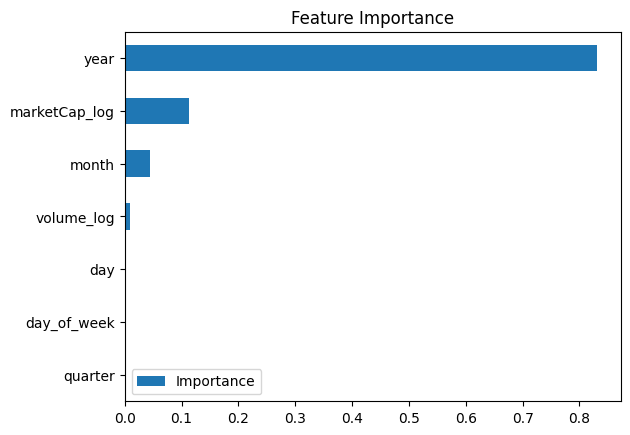

In [536]:
fi.sort_values(by='Importance').plot(kind='barh',title='Feature Importance')
plt.show()

#debo crear las variables

## Predicción

In [537]:
test["pred"]=reg.predict(x_test)

C:\Users\karim\AppData\Local\Temp\ipykernel_68448\2753135521.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["pred"]=reg.predict(x_test)


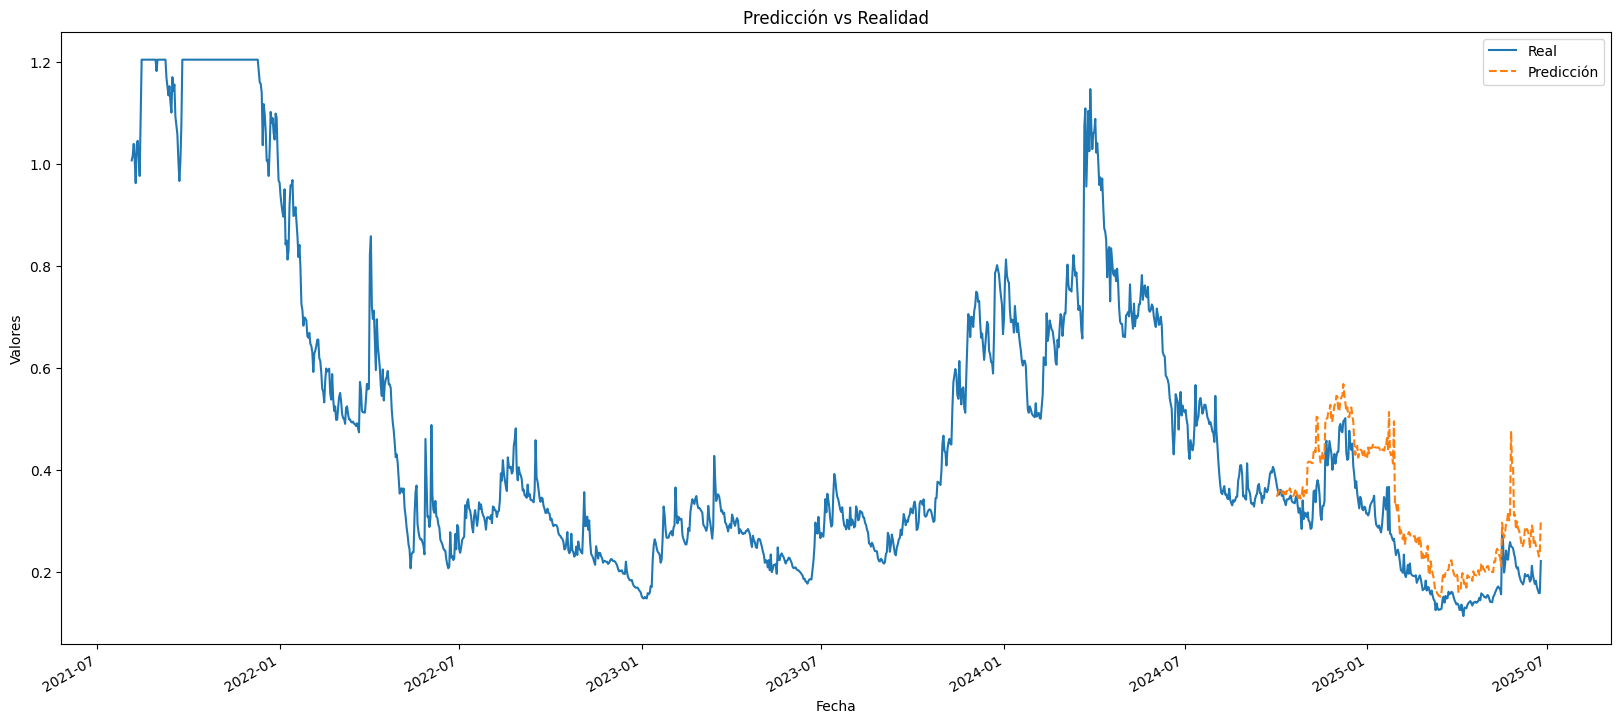

In [538]:
ax = data["high"].plot(figsize=(20, 9), title='Predicción vs Realidad')
test["pred"].plot(ax=ax, style='--')
plt.legend(["Real", "Predicción"])
plt.xlabel('Fecha')
plt.ylabel('Valores')
plt.show()

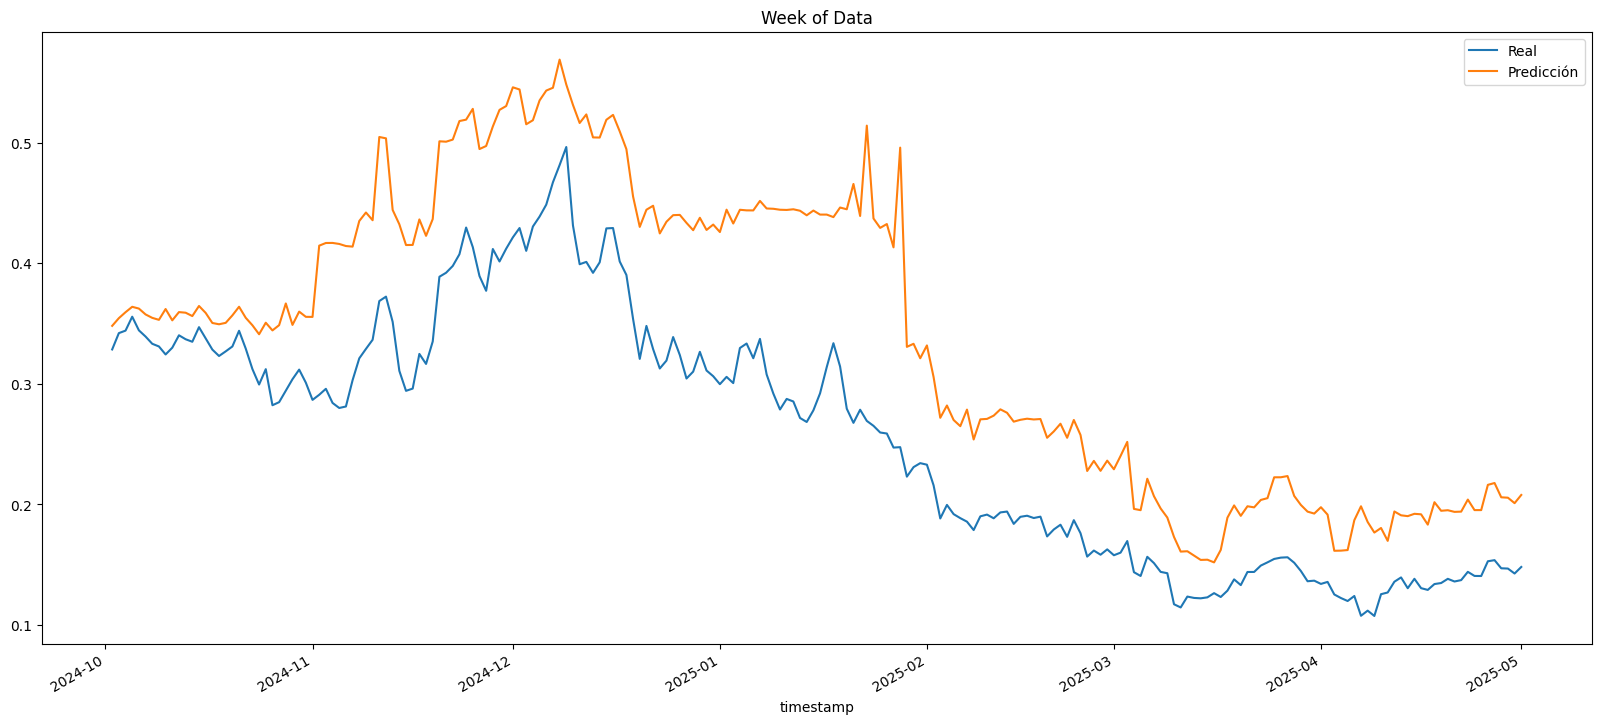

In [539]:
data["close"].loc[(data.index > '10-01-2024')&(data.index < '05-01-2025')].plot(figsize=(20, 9),title="Week of Data")
test["pred"].loc[(test.index > '10-01-2024')&(test.index < '05-01-2025')].plot(figsize=(20, 9),title="Week of Data")
plt.legend(["Real", "Predicción"])


In [544]:
mean_squared_error(y_test,test["pred"])


0.00899099101729497

In [541]:
np.abs(y_test - test["pred"])

timestamp
2024-10-01 23:59:59.999000+00:00    0.019561
2024-10-02 23:59:59.999000+00:00    0.012395
2024-10-03 23:59:59.999000+00:00    0.015264
2024-10-04 23:59:59.999000+00:00    0.008204
2024-10-05 23:59:59.999000+00:00    0.018038
                                      ...   
2025-06-20 23:59:59.999000+00:00    0.084450
2025-06-21 23:59:59.999000+00:00    0.083685
2025-06-22 23:59:59.999000+00:00    0.083987
2025-06-23 23:59:59.999000+00:00    0.081983
2025-06-24 23:59:59.999000+00:00    0.102169
Length: 267, dtype: float64